# Importing Basic Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Define the exchange rate from INR to GBP as of 01/04/2025
exchange_rate_inr_to_gbp = 0.009055

# Check if the 'Price' column exists before performing conversion
if 'Price' in df.columns:
    # Convert the 'Price' column from INR to GBP and store in a new column
    df['Price_GBP'] = df['Price'] * exchange_rate_inr_to_gbp

    # Round the converted prices to 2 decimal places for currency formatting
    df['Price_GBP'] = df['Price_GBP'].round(2)
else:
    print("'Price' column not found in DataFrame.")

In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Price_GBP'],
      dtype='object')

In [6]:
# Remove unwanted columns (e.g., 'Unnamed: 0') by selecting only the relevant features
# This step ensures the DataFrame only contains meaningful attributes for analysis

columns_to_keep = [
    'Company', 'TypeName', 'Inches', 'ScreenResolution',
    'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_GBP'
]

df = df[columns_to_keep]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,646.33
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,433.69
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,277.41
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1224.19
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,870.15


In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_GBP           0
dtype: int64

In [8]:
# checking for duplicated rows

df.duplicated().sum()

29

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_GBP         1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
# Select categorical features (typically of type 'object' or 'category')
catvars = df.select_dtypes(include=['object', 'category']).columns

# Select numerical features (integer and float types, both 32-bit and 64-bit)
numvars = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

# Output the list of categorical and numerical columns
catvars, numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price_GBP'], dtype='object'))

In [11]:
# Define a function to print the unique values in a specified column of the DataFrame
def uniquevals(df, col):
    """
    Displays all unique values present in the specified column of the DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    col (str): The name of the column to analyze.
    """
    print(f'Unique values in column "{col}":\n{df[col].unique()}\n')

# Define a function to print the frequency count of each unique value in a specified column
def valuecounts(df, col):
    """
    Displays the frequency (value counts) of each unique entry in the specified column of the DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    col (str): The name of the column to analyze.
    """
    print(f'Value counts in column "{col}":\n{df[col].value_counts()}\n')

# Loop through all columns in the DataFrame to display unique values and their frequencies
for col in df.columns:
    uniquevals(df, col)      # Print unique values for the current column
    valuecounts(df, col)     # Print value counts for the current column
    print("-" * 75)          # Print a separator for better readability


Unique values in column "Company":
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Value counts in column "Company":
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

---------------------------------------------------------------------------
Unique values in column "TypeName":
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Value counts in column "TypeName":
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype

In [12]:
# Ensure 'Ram' column is string before removing the 'GB' unit
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)

# Ensure 'Weight' column is string before removing the 'kg' unit
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False)

# Convert 'Ram' column to integer for numerical processing
df['Ram'] = df['Ram'].astype('int32')

# Convert 'Weight' column to float for numerical processing
df['Weight'] = df['Weight'].astype('float32')

# Display the first 5 rows to verify the changes
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15


In [13]:
# Display concise summary of the DataFrame including index, column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_GBP         1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

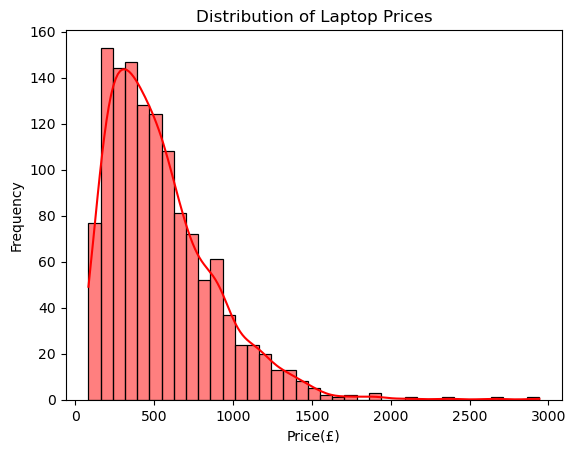

In [15]:
# Visualize the distribution of the 'Price' column using a histogram with a KDE overlay
# - KDE (Kernel Density Estimation) gives a smooth curve representing the distribution
# - 'color' sets the visual color of the plot

sns.histplot(df['Price_GBP'], kde=True, color='red')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price(£)')
plt.ylabel('Frequency')
plt.show()

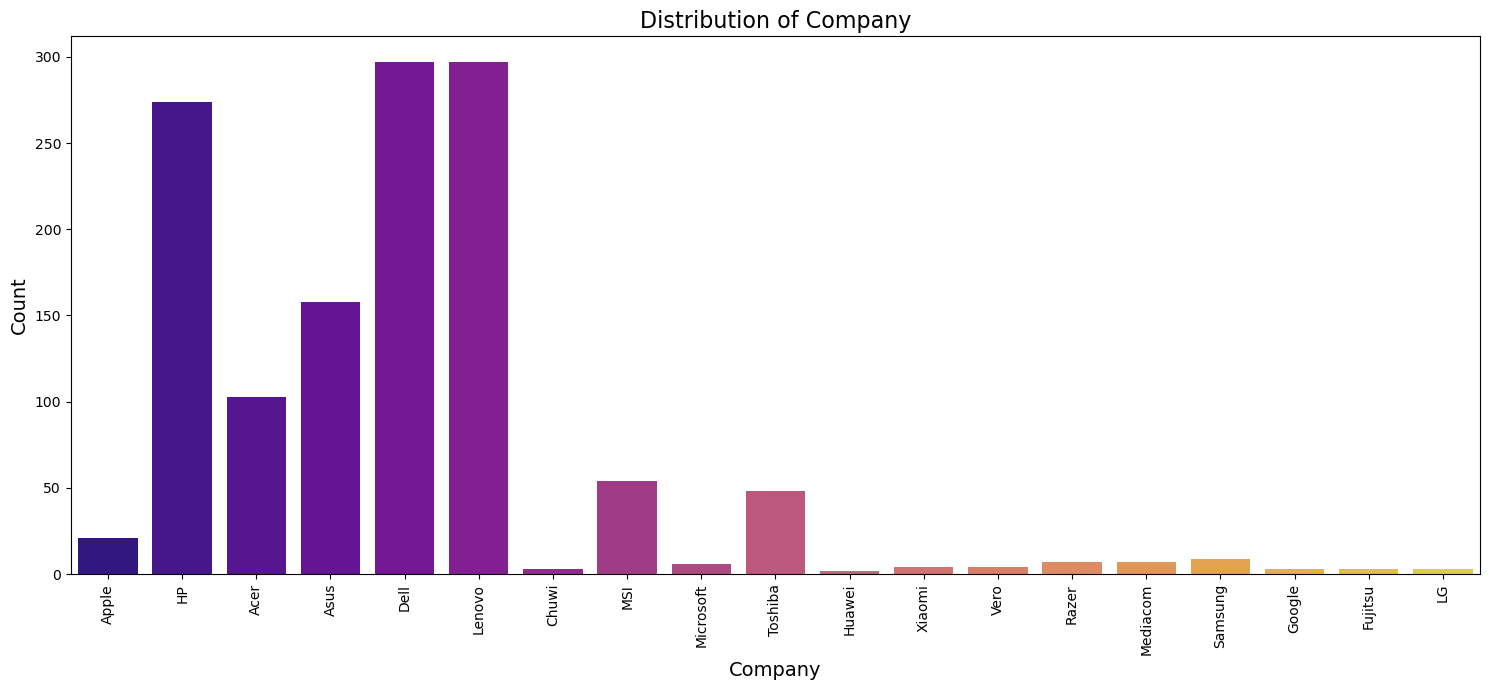

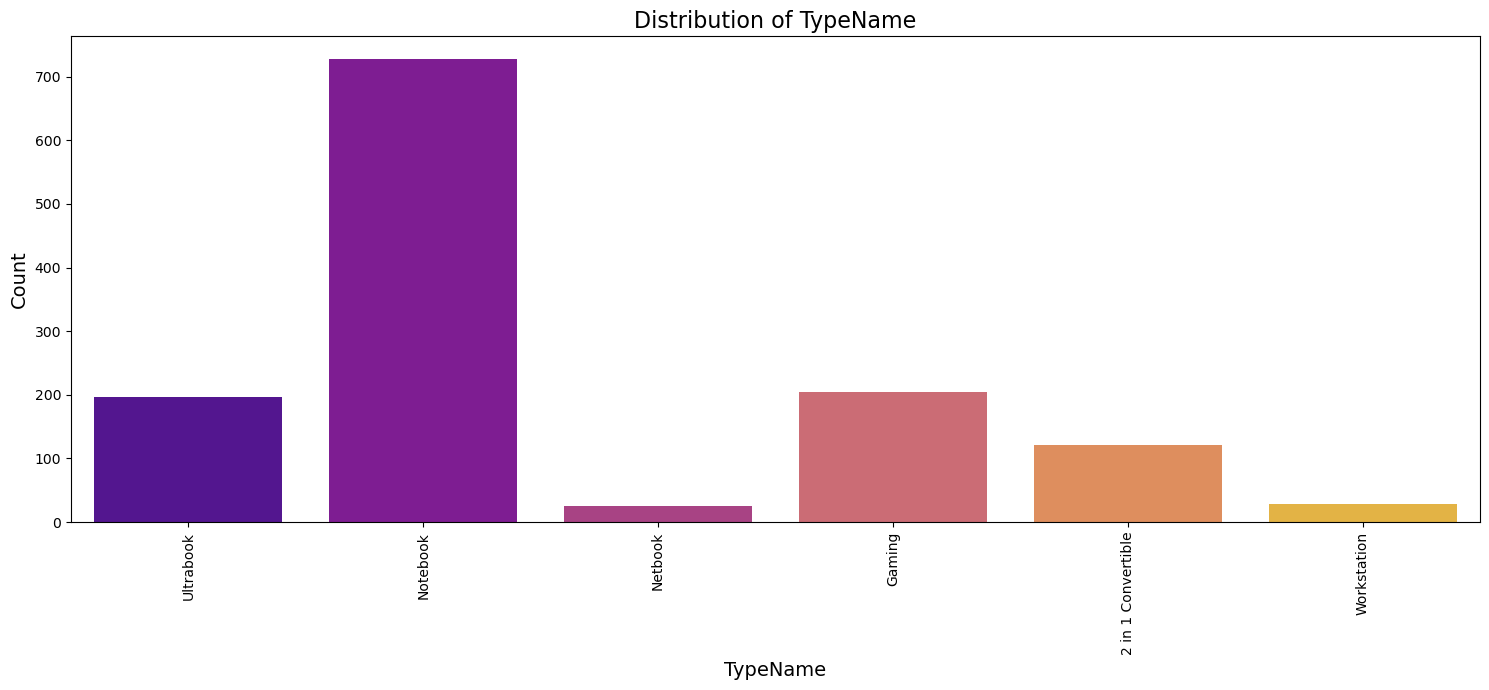

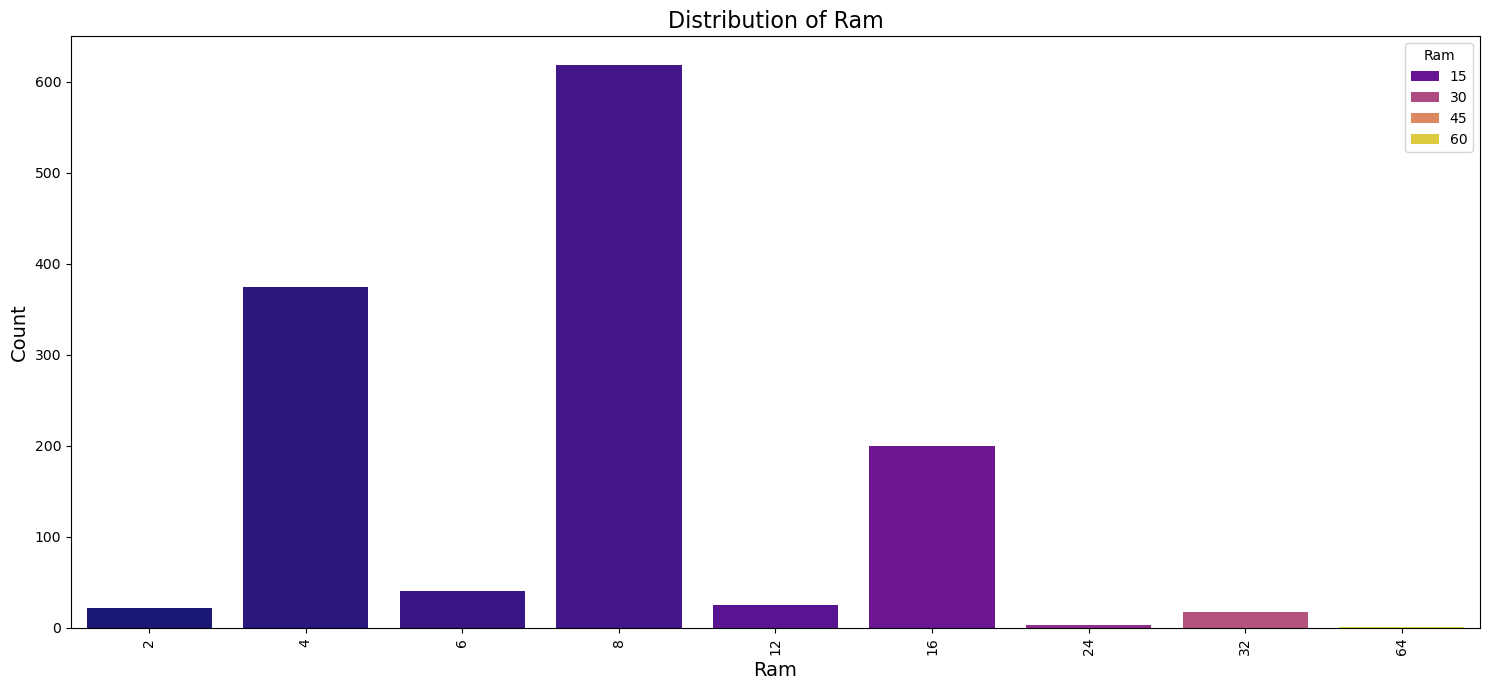

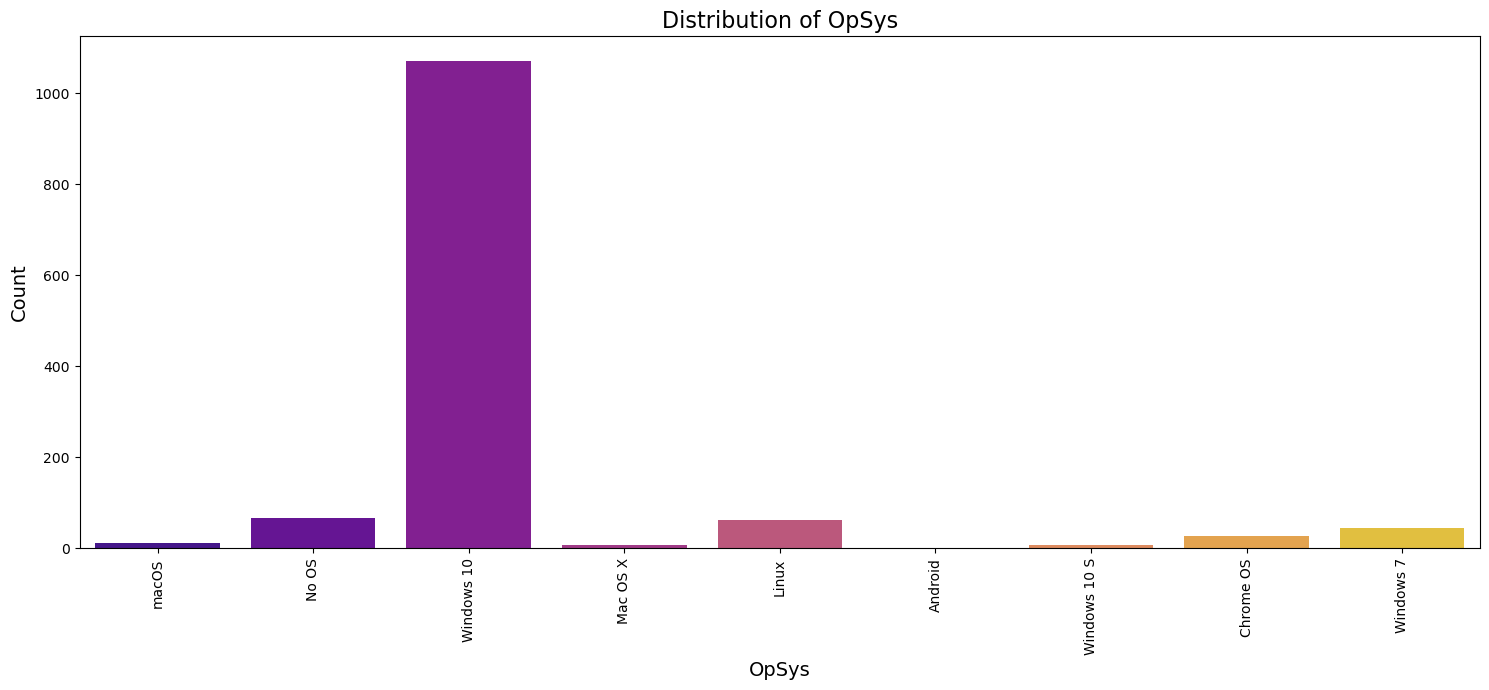

In [16]:
# plotting countplots for the categorical variables

# Define a function to draw countplots for categorical variables
def drawplot(col):
    """
    Draws a countplot for a given categorical column in the DataFrame.
    
    Parameters:
    col (str): Name of the categorical column to plot.
    """
    plt.figure(figsize=(15, 7))  # Set figure size for better readability
    sns.countplot(x=col, data=df, hue=col, palette='plasma')  # Countplot for category frequency
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation='vertical')  # Rotate x-axis labels for better fit
    plt.tight_layout()  # Prevent clipping of labels
    plt.show()  # Display the plot

# List of categorical variables to visualize
toview = ['Company', 'TypeName', 'Ram', 'OpSys']

# Generate countplots for each categorical feature
for col in toview:
    drawplot(col)

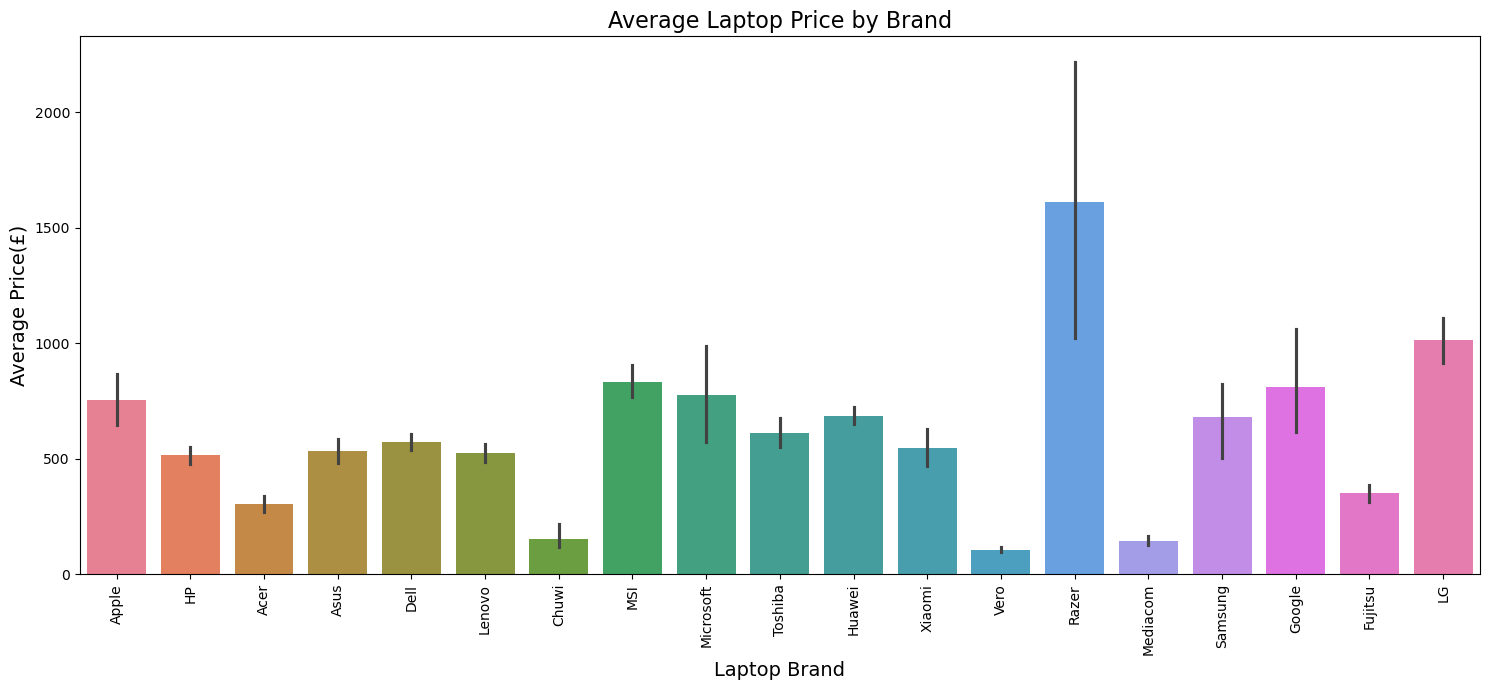

In [17]:
# Visualize the average price for each laptop brand
# This helps uncover how different companies position their products in terms of pricing

plt.figure(figsize=(15, 7))  # Set figure size for readability
sns.barplot(x='Company', y='Price_GBP', data=df, hue='Company', estimator=np.mean)

plt.title('Average Laptop Price by Brand', fontsize=16)
plt.xlabel('Laptop Brand', fontsize=14)
plt.ylabel('Average Price(£)', fontsize=14)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

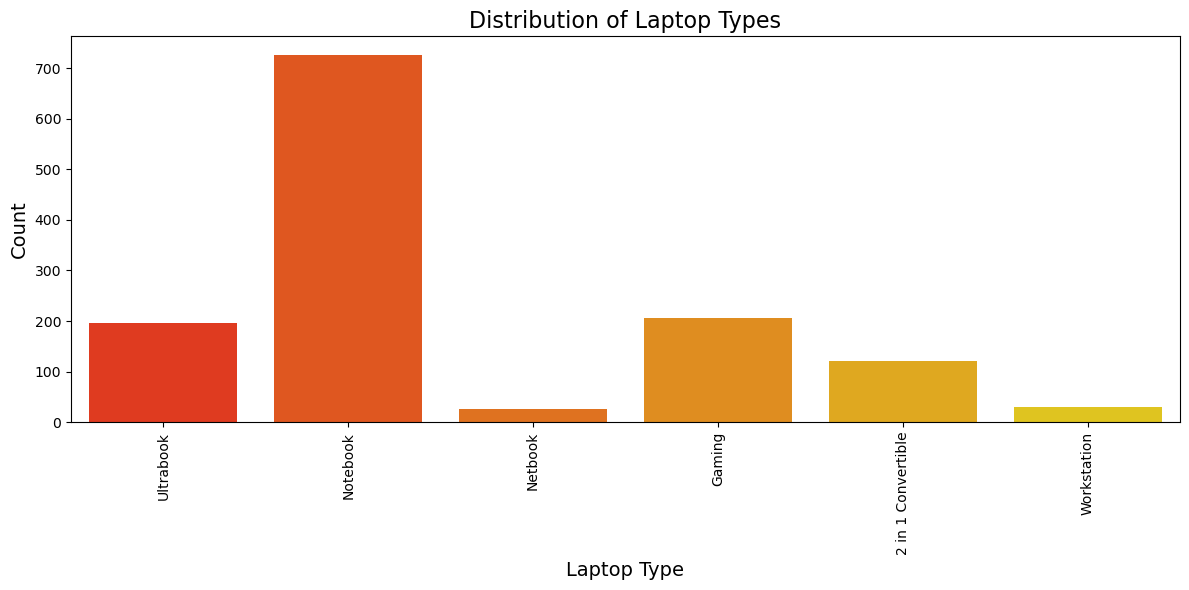

In [18]:
# Visualize the count of different types of laptops (e.g., Ultrabook, Gaming, Notebook)
plt.figure(figsize=(12, 6))
sns.countplot(x='TypeName', data=df, hue='TypeName', palette='autumn', legend=False)

plt.title('Distribution of Laptop Types', fontsize=16)
plt.xlabel('Laptop Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

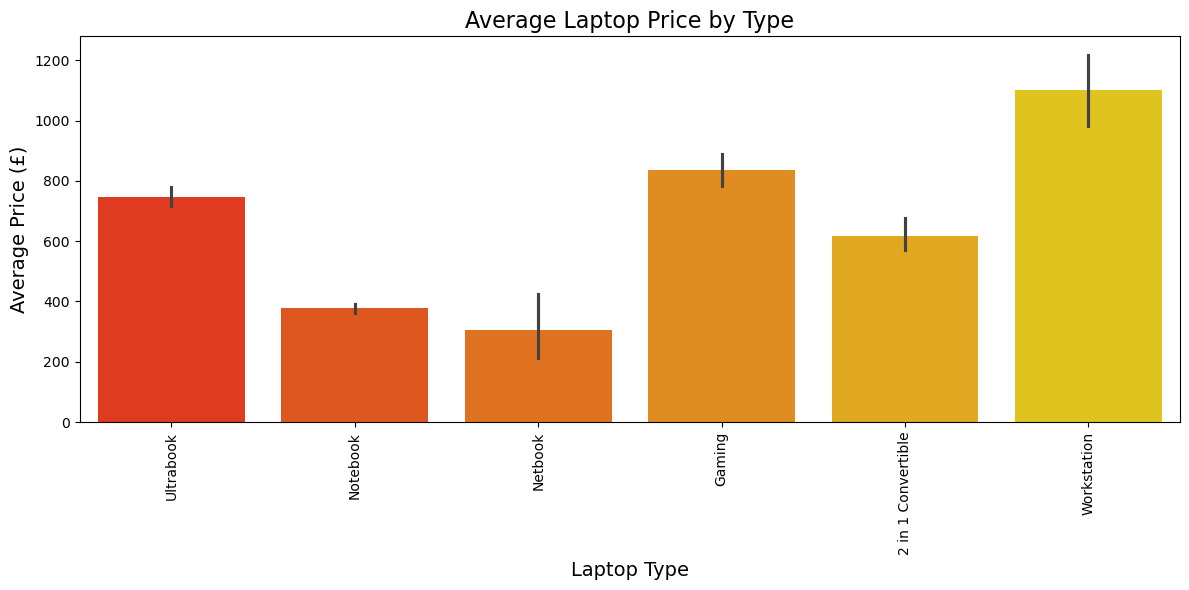

In [19]:
# Visualize the average price for each type of laptop
# This helps to understand how pricing differs across categories like Ultrabook, Notebook, Gaming, etc.

plt.figure(figsize=(12, 6))
sns.barplot(
    x='TypeName',
    y='Price_GBP',
    hue='TypeName',
    data=df,
    estimator=np.mean,
    palette='autumn',
    legend=False                  # Hide redundant legend
)

plt.title('Average Laptop Price by Type', fontsize=16)
plt.xlabel('Laptop Type', fontsize=14)
plt.ylabel('Average Price (£)', fontsize=14)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

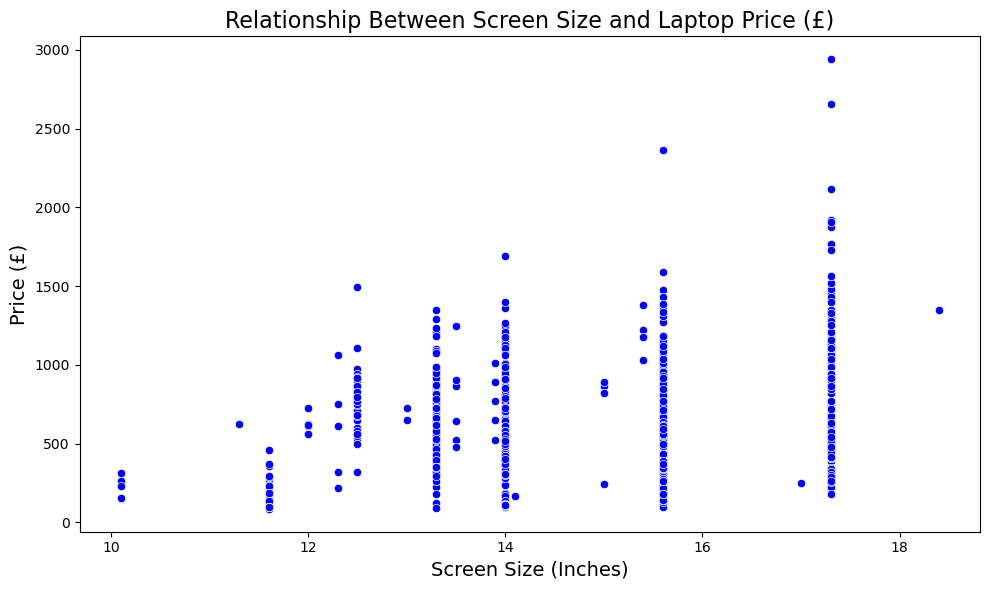

In [20]:
# Visualize the relationship between screen size (in inches) and laptop price in GBP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_GBP', data=df, color='blue')

plt.title('Relationship Between Screen Size and Laptop Price (£)', fontsize=16)
plt.xlabel('Screen Size (Inches)', fontsize=14)
plt.ylabel('Price (£)', fontsize=14)
plt.tight_layout()
plt.show()

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [22]:
# Display the frequency of each unique screen resolution in the dataset
# This helps identify the most common screen resolutions among laptops

screen_resolution_counts = df['ScreenResolution'].value_counts()
print(screen_resolution_counts)

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

#### Categorical Encoding

In [24]:
# Create a new binary column 'TouchScreen' based on whether the screen supports touch input
# - If 'Touchscreen' is found in the 'ScreenResolution' string, assign 1 (True)
# - Otherwise, assign 0 (False)

df['TouchScreen'] = df['ScreenResolution'].apply(
    lambda value: 1 if 'Touchscreen' in value else 0
)

# Preview the updated DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0


In [25]:
# Display a random sample of 5 rows from the DataFrame
# Useful for quick inspection of the dataset after preprocessing steps

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen
808,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,810.03,0
706,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,481.97,1
170,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,650.83,0
601,HP,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.10,322.51,0
381,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,No OS,1.85,194.67,0


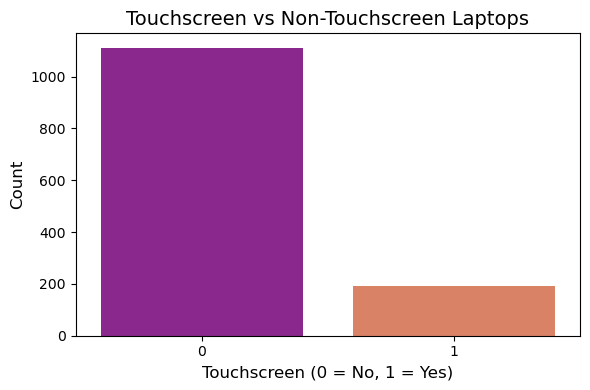

In [26]:
# Countplot to show how many laptops are touchscreen vs non-touchscreen
plt.figure(figsize=(6, 4))
sns.countplot(x='TouchScreen', data=df, hue='TouchScreen', palette='plasma', legend=False)

plt.title('Touchscreen vs Non-Touchscreen Laptops', fontsize=14)
plt.xlabel('Touchscreen (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

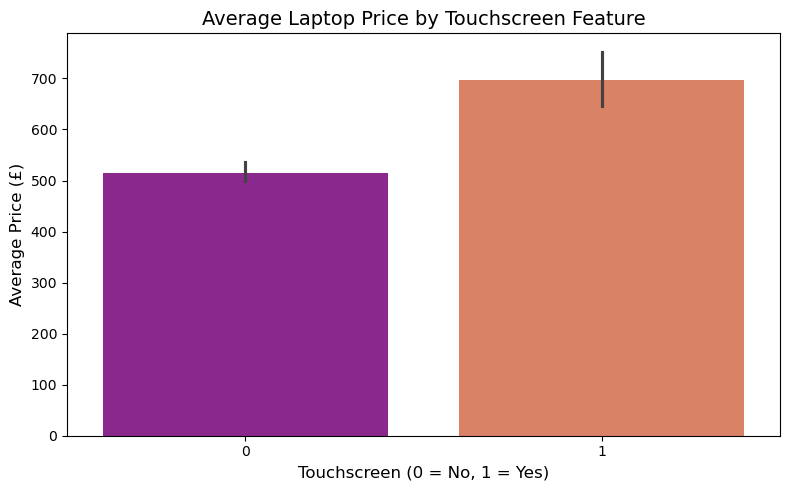

In [27]:
# Compare average laptop prices based on touchscreen capability
# 0 = Non-touchscreen, 1 = Touchscreen

plt.figure(figsize=(8, 5))
sns.barplot(
    x='TouchScreen',
    y='Price_GBP',
    data=df,
    hue='TouchScreen',
    palette='plasma',
    estimator=np.mean,
    legend=False                 # Hide redundant legend
)

plt.title('Average Laptop Price by Touchscreen Feature', fontsize=14)
plt.xlabel('Touchscreen (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# Create a new binary column 'IPS' to indicate whether the laptop has an IPS display
# - Assigns 1 if 'IPS' is found in the 'ScreenResolution' text
# - Otherwise assigns 0

df['IPS'] = df['ScreenResolution'].apply(
    lambda x: 1 if 'IPS' in x else 0
)

In [29]:
# Display a random sample of 5 rows to verify the new column
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS
84,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,190.57,0,0
464,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,1008.32,0,0
1199,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,988.49,0,0
863,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,No OS,2.50,490.65,0,1
78,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,255.70,0,0


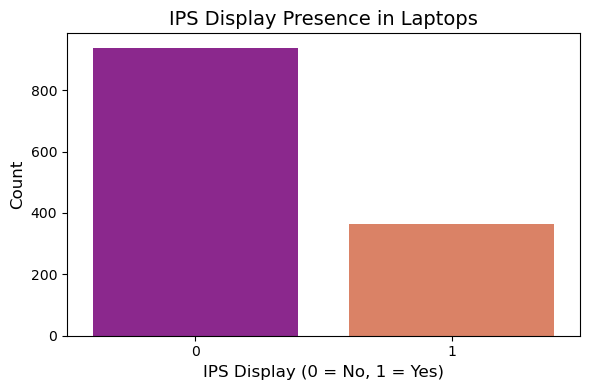

In [30]:
# Plot the count of laptops with and without IPS display panels
plt.figure(figsize=(6, 4))
sns.countplot(
    x='IPS',
    data=df,
    hue='IPS',
    palette='plasma',
    legend=False          # Hide redundant legend since x-axis already labels it
)

plt.title('IPS Display Presence in Laptops', fontsize=14)
plt.xlabel('IPS Display (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

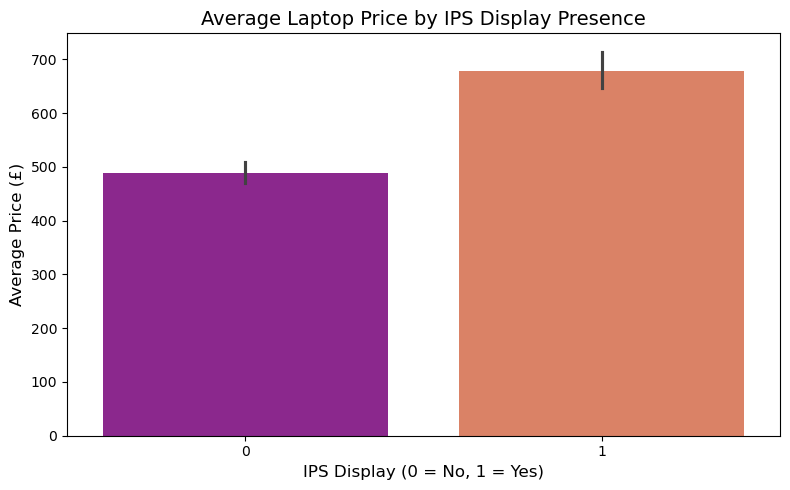

In [31]:
# Visualize how the presence of an IPS display affects average laptop price
plt.figure(figsize=(8, 5))
sns.barplot(
    x='IPS',
    y='Price_GBP',
    data=df,
    hue='IPS',
    estimator=np.mean,
    palette='plasma',
    legend=False
)

plt.title('Average Laptop Price by IPS Display Presence', fontsize=14)
plt.xlabel('IPS Display (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.tight_layout()
plt.show()


### Extracting the X Resolution and the Y Resolution

In [33]:
# Split the 'ScreenResolution' column at the character 'x' to separate horizontal and vertical resolution
# This helps in extracting numerical features for screen width (X_res) and height (Y_res)

splitdf = df['ScreenResolution'].str.split('x', n=1, expand=True)

# Display the first 5 rows of the resulting split DataFrame
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [34]:
# --------------------------------------------
# Clean and extract screen resolution features
# --------------------------------------------

# Extract the horizontal resolution (X_res) from the first part of the split screen resolution string
df['X_res'] = (
    splitdf[0]
    .str.replace(',', '', regex=False)                          # Remove any commas (e.g., '3,840' → '3840')
    .str.extract(r'(\d+\.?\d*)', expand=False)                  # Extract the first numeric value (integer or float)
    .astype(float)                                              # Convert to float (in case of decimal input)
    .astype(int)                                                # Then cast to integer for modeling consistency
)

# Extract the vertical resolution (Y_res) from the second part of the split screen resolution string
df['Y_res'] = (
    splitdf[1]
    .str.replace(',', '', regex=False)                          # Remove any commas
    .str.extract(r'(\d+\.?\d*)', expand=False)                  # Extract the numeric value
    .astype(float)                                              # Convert to float
    .astype(int)                                                # Cast to integer
)


In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,2560,1600


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_GBP         1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


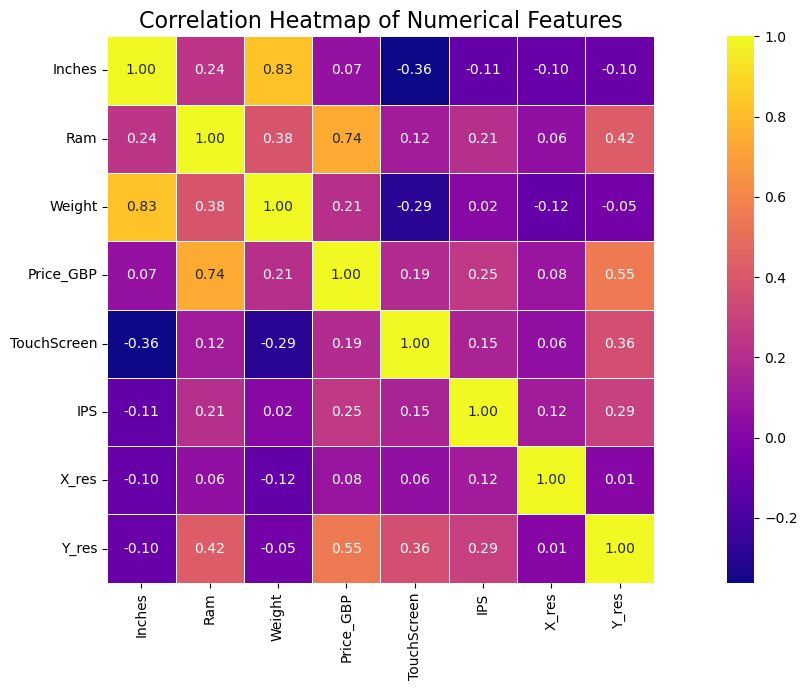

In [37]:
# --------------------------------------------
# Plot the correlation heatmap for numerical features
# --------------------------------------------

plt.figure(figsize=(15, 7))

# Compute and visualize the correlation matrix
sns.heatmap(
    df.corr(numeric_only=True),     # Ensures only numeric columns are included (safe for newer pandas)
    annot=True,                     # Display correlation coefficients
    fmt=".2f",                      # Format to 2 decimal places
    cmap='plasma',                  # Colormap for visual appeal
    linewidths=0.5,                 # Optional: adds grid lines between cells
    square=True                     # Optional: makes cells square for symmetry
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [38]:
# Display the correlation of all numeric features with laptop price (in GBP)
df.corr(numeric_only=True)['Price_GBP'].sort_values(ascending=False)

Price_GBP      1.000000
Ram            0.743007
Y_res          0.552809
IPS            0.252207
Weight         0.210370
TouchScreen    0.191226
X_res          0.083832
Inches         0.068197
Name: Price_GBP, dtype: float64

**Correlation Analysis and Feature Engineering Insight**

From the correlation plot, we observed that both `X_res` and `Y_res` (the horizontal and vertical screen resolutions) are **positively correlated** with `Price_GBP`. This indicates that laptops with higher resolution screens tend to be more expensive. 

To extract more meaningful features, we split the original `ScreenResolution` column into two separate numeric columns: `X_res` and `Y_res`. 

However, since `X_res` and `Y_res` are highly collinear (they tend to increase together), we can **combine them with the `Inches` column** (which shows lower correlation with price) to compute a new feature: **Pixels Per Inch (PPI)** — a more informative and compressed representation of screen quality.

The formula used to compute PPI is:

$$
PPI = \frac{\sqrt{X_{res}^2 + Y_{res}^2}}{Inches}
$$

This single feature captures both screen resolution and screen size, and often has stronger explanatory power when predicting price or quality-related metrics.


In [40]:
# --------------------------------------------
# Create a new feature: Pixels Per Inch (PPI)
# Combines screen resolution and size into a single meaningful metric
# --------------------------------------------

df['PPI'] = (
    ((df['X_res']**2 + df['Y_res']**2) ** 0.5) / df['Inches']
).astype('float')

# Preview the updated DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,2560,1600,226.983005


In [41]:
# Display the correlation of all numerical features with the target variable 'Price_GBP'
df.corr(numeric_only=True)['Price_GBP'].sort_values(ascending=False)

Price_GBP      1.000000
Ram            0.743007
Y_res          0.552809
PPI            0.348331
IPS            0.252207
Weight         0.210370
TouchScreen    0.191226
X_res          0.083832
Inches         0.068197
Name: Price_GBP, dtype: float64

**Feature Selection Based on Correlation Analysis**

From the correlation matrix, we observe that `PPI` (Pixels Per Inch) shows a strong positive correlation with `Price_GBP`. Since `PPI` is a derived feature that effectively combines the information from three other columns — `Inches`, `X_res`, and `Y_res` — it serves as a more concise and informative representation of screen quality.

To reduce multicollinearity and avoid redundant information in the dataset, we will drop the original columns: `Inches`, `X_res`, and `Y_res`, and retain `PPI` for further analysis and modeling.

In [43]:
# Drop redundant columns after extracting and engineering screen-related features
# - 'ScreenResolution' has been parsed into numerical components
# - 'Inches', 'X_res', and 'Y_res' are now represented through the 'PPI' feature

df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)

# Preview the cleaned DataFrame
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005


**Processing the 'Cpu' Column**

The `Cpu` column contains a combination of textual and numeric data, including the processor brand, family, and sometimes the generation. To make this column more useful for analysis and modeling, we need to extract meaningful features from this text.

By efficiently parsing the CPU information, we can categorize laptops based on processor type (e.g., Intel Core i7, AMD Ryzen 5), which may provide valuable insights into performance and pricing trends.

In [45]:
# --------------------------------------------
# Explore the distribution of CPU descriptions
# --------------------------------------------

# View the frequency of each unique CPU configuration in the dataset
cpu_counts = df['Cpu'].value_counts()

# Display the most common CPU types
print(cpu_counts)

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64


**CPU Feature Engineering Strategy**

Most laptops in the dataset use Intel processors, but there's also a significant presence of AMD CPUs. To extract meaningful insights, we will categorize the CPUs into the following groups:

- `Intel Core i5` and `Intel Core i7`: Common mid- and high-range processors
- `Intel Other`: All other Intel CPUs that are not part of the Core i-series (e.g., Celeron, Pentium)
- `AMD`: All AMD processors, grouped as a separate category

To implement this, we’ll extract the **first three words** from each entry in the `Cpu` column, as they typically represent the processor family and model (e.g., "Intel Core i7", "AMD Ryzen 5"). This will allow us to cluster CPUs into interpretable and analyzable categories.

In [47]:
# ----------------------------------------------------
# Extract the CPU name by taking the first 3 words
# This typically captures the brand, series, and model (e.g., 'Intel Core i7')
# ----------------------------------------------------

df['CPU_name'] = df['Cpu'].apply(lambda text: " ".join(text.split()[:3]))

# Preview the updated DataFrame
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5


In [48]:
# --------------------------------------------------------
# Function to classify CPU types into meaningful categories
# - Retains 'Intel Core i3/i5/i7' as-is
# - Maps other Intel CPUs to 'Other Intel Processor'
# - Maps all others (typically AMD) to 'AMD Processor'
# --------------------------------------------------------

def classify_cpu(text):
    """
    Categorizes CPU based on its prefix.
    
    Parameters:
        text (str): The first three words of the CPU string.
    
    Returns:
        str: CPU category label.
    """
    if text in ['Intel Core i3', 'Intel Core i5', 'Intel Core i7']:
        return text
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

# Apply the CPU classification function to the CPU_name column
df['CPU_name'] = df['CPU_name'].apply(classify_cpu)

# Preview the updated DataFrame
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5


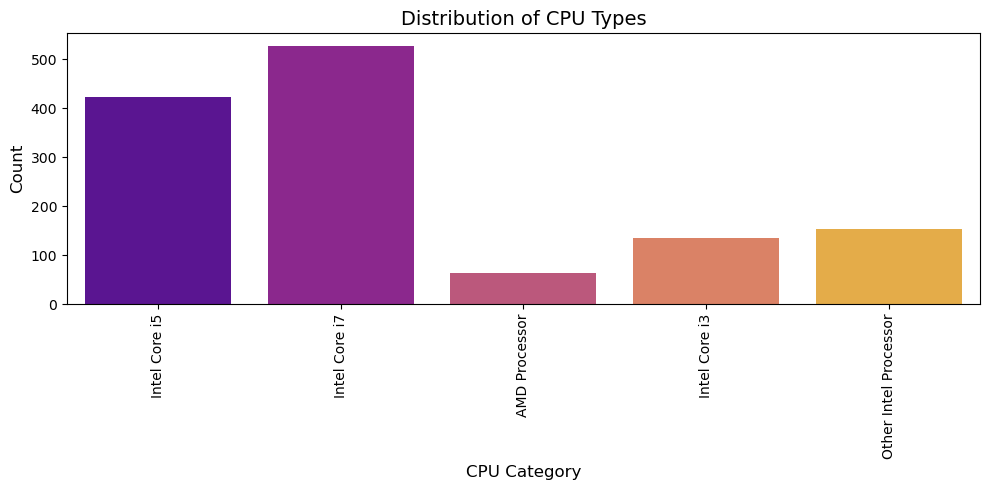

In [49]:
# --------------------------------------------------------
# Visualize the distribution of CPU categories
# --------------------------------------------------------

plt.figure(figsize=(10, 5))
sns.countplot(
    x='CPU_name',
    data=df,
    hue='CPU_name', 
    palette='plasma',
    legend=False               # Suppress redundant legend
)

plt.title('Distribution of CPU Types', fontsize=14)
plt.xlabel('CPU Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

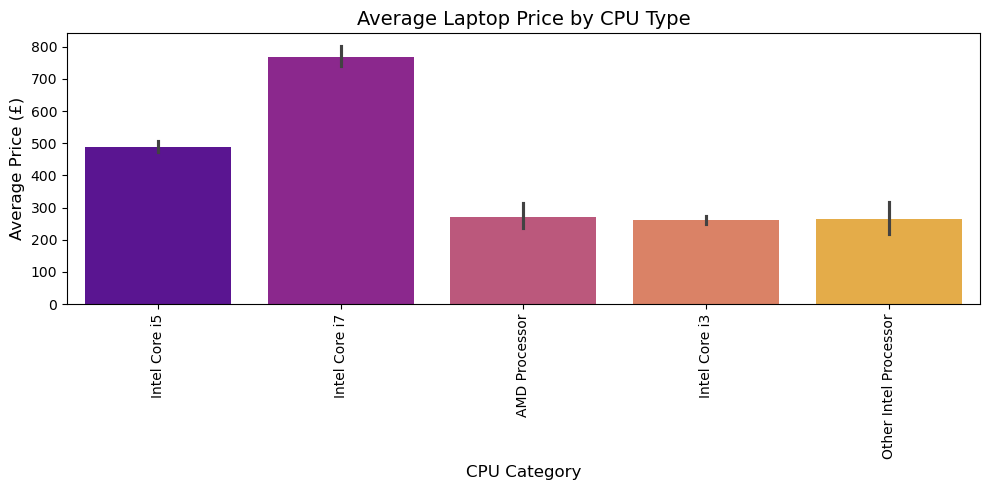

In [50]:
# --------------------------------------------------------
# Visualize average laptop price for each CPU category
# --------------------------------------------------------

plt.figure(figsize=(10, 5))
sns.barplot(
    x='CPU_name',
    y='Price_GBP',
    data=df,
    hue='CPU_name',     
    palette='plasma',
    estimator=np.mean,    
    legend=False                 # Hide redundant legend
)

plt.title('Average Laptop Price by CPU Type', fontsize=14)
plt.xlabel('CPU Category', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [51]:
# --------------------------------------------------------
# Drop the original 'Cpu' column after feature extraction
# - 'CPU_name' now holds the cleaned and categorized processor information
# --------------------------------------------------------

df.drop(columns=['Cpu'], inplace=True)

# Preview the updated DataFrame
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

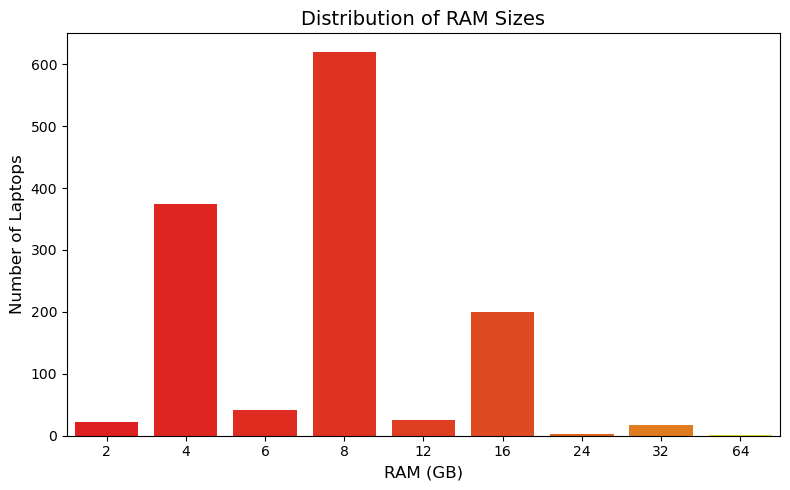

In [53]:
# --------------------------------------------------------
# Visualize the distribution of RAM sizes across laptops
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.countplot(
    x='Ram',
    data=df,
    hue='Ram',
    palette='autumn',
    legend=False
)

plt.title('Distribution of RAM Sizes', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Number of Laptops', fontsize=12)
plt.tight_layout()
plt.show()

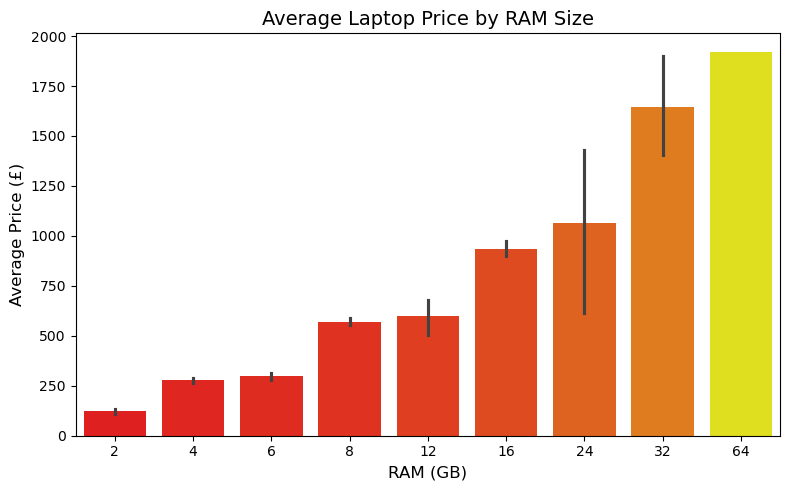

In [54]:
# --------------------------------------------------------
# Visualize average laptop price based on RAM size
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Ram',
    y='Price_GBP',
    data=df,
    hue='Ram',
    palette='autumn',
    estimator=np.mean,
    legend=False 
)

plt.title('Average Laptop Price by RAM Size', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.tight_layout()
plt.show()

##### Memory Column Preprocessing

The `Memory` column contains mixed-format information — not just capacity, but also the **type of storage** (e.g., SSD, HDD) and occasionally a **combination of multiple drives** (e.g., "128GB SSD + 1TB HDD").

To make this column usable for analysis and modeling, we need to:
1. **Separate storage capacity from storage type**
2. **Normalize all memory values into the same unit (e.g., GB)**
3. **Split combined entries into individual components** (e.g., extract both SSD and HDD from "128GB SSD + 1TB HDD")

This transformation is crucial because storage type and capacity are both strong indicators of price and performance — combining them into structured numeric features will enhance model interpretability and accuracy.

In [56]:
# View the first entry in the 'Memory' column to understand its format
first_memory_entry = df.loc[0, 'Memory']
print(first_memory_entry)

128GB SSD


In [57]:
# --------------------------------------------------------
# Explore the unique memory configurations and their frequencies
# --------------------------------------------------------

# This helps identify the different combinations of storage types (e.g., SSD + HDD)
memory_counts = df['Memory'].value_counts()

# Display the distribution of memory types and configurations
print(memory_counts)

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [58]:
# --------------------------------------------------------
# Step-by-step preprocessing of the 'Memory' column
# Goal: Normalize units, remove noise, and split combined storage configurations
# --------------------------------------------------------

# 1. Convert 'Memory' column to string and remove trailing decimals (e.g., '1.0TB' → '1TB')
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)

# 2. Remove 'GB' unit (we will retain numbers only)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False)

# 3. Replace 'TB' with '000' to convert TB to equivalent GB (e.g., '1TB' → '1000')
df['Memory'] = df['Memory'].str.replace('TB', '000', regex=False)

# 4. Split entries that contain '+' into two separate parts (e.g., '128 SSD + 1TB HDD')
memory_split = df['Memory'].str.split('+', n=1, expand=True)

# Preview the resulting split columns
memory_split.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [59]:
# --------------------------------------------------------
# Clean the first part of the split memory configuration
# --------------------------------------------------------

# Assign the first storage component from the split memory column
df['first'] = memory_split[0]

# Remove any leading or trailing whitespace from the storage value
df['first'] = df['first'].str.strip()

# Preview the updated DataFrame
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5,256 SSD


In [60]:
# --------------------------------------------------------
# Function to create binary columns for different storage types from the 'first' memory part
# --------------------------------------------------------

def create_storage_flags(df, column, storage_types, prefix='StorageType_'):
    """
    Creates binary indicator columns for specified storage types based on a text column.

    Parameters:
    df (DataFrame): The dataset to modify
    column (str): The name of the column to search in (e.g., 'first')
    storage_types (list): List of storage type keywords to detect (e.g., ['HDD', 'SSD'])
    prefix (str): Prefix to use when naming the new columns
    """
    for storage in storage_types:
        col_name = f"{prefix}{storage}"
        df[col_name] = df[column].apply(lambda x: 1 if storage.lower() in x.lower() else 0)

# Define storage types to detect
storage_keywords = ['HDD', 'SSD', 'Hybrid', 'Flash']

# Apply the function to the 'first' memory string
create_storage_flags(df, column='first', storage_types=storage_keywords)

# Preview updated DataFrame
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,first,StorageType_HDD,StorageType_SSD,StorageType_Hybrid,StorageType_Flash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [61]:
# --------------------------------------------------------
# Extract numeric memory capacity (in GB) from the 'first' memory string
# Removes all non-digit characters using regex
# --------------------------------------------------------

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Check the frequency of each extracted numeric value
df['first'].value_counts()

first
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [62]:
# --------------------------------------------------------
# Extract the second storage configuration (if available) from the split memory column
# This captures storage setups like '128 SSD + 1TB HDD'
# --------------------------------------------------------

df['Second'] = memory_split[1]

# Preview the updated DataFrame
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,first,StorageType_HDD,StorageType_SSD,StorageType_Hybrid,StorageType_Flash,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [63]:
# --------------------------------------------------------
# Clean and extract features from the second memory component (e.g., after '+')
# --------------------------------------------------------

# Fill missing values in 'Second' column with placeholder string to prevent errors
df['Second'] = df['Second'].fillna("0")

# Define storage types to search for in the second memory entry
secondary_storage_types = ['HDD', 'SSD', 'Hybrid', 'Flash']

# Create binary flags for each storage type found in the second part
def create_secondary_storage_flags(df, column, storage_types, prefix='StorageType2_'):
    """
    Creates binary indicator columns for storage types found in the second part of the memory string.

    Parameters:
        df (DataFrame): The dataset to modify
        column (str): The name of the column to search in
        storage_types (list): Storage type keywords (e.g., ['SSD', 'HDD'])
        prefix (str): Prefix for naming new indicator columns
    """
    for storage in storage_types:
        col_name = f"{prefix}{storage}"
        df[col_name] = df[column].apply(lambda x: 1 if storage.lower() in x.lower() else 0)

# Apply the helper function
create_secondary_storage_flags(df, column='Second', storage_types=secondary_storage_types)

# Remove all non-digit characters to isolate numeric values
df['Second'] = df['Second'].str.replace(r'\D', '', regex=True)

# Display frequency of numeric values in the second memory field
df['Second'].value_counts()

Second
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [64]:
# --------------------------------------------------------
# Convert storage capacity columns from string to integer
# These are now clean numeric representations of storage in GB
# --------------------------------------------------------

df['first'] = df['first'].astype(int)
df['Second'] = df['Second'].astype(int)

# Preview the updated DataFrame
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,...,first,StorageType_HDD,StorageType_SSD,StorageType_Hybrid,StorageType_Flash,Second,StorageType2_HDD,StorageType2_SSD,StorageType2_Hybrid,StorageType2_Flash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,...,256,0,1,0,0,0,0,0,0,0


In [65]:
# --------------------------------------------------------
# Finalize storage capacity features by calculating actual size per type
# Each storage type is calculated by multiplying the capacity value with its corresponding binary indicator
# --------------------------------------------------------

df["HDD"] = (
    df["first"] * df["StorageType_HDD"] + df["Second"] * df["StorageType2_HDD"]
)

df["SSD"] = (
    df["first"] * df["StorageType_SSD"] + df["Second"] * df["StorageType2_SSD"]
)

df["Hybrid"] = (
    df["first"] * df["StorageType_Hybrid"] + df["Second"] * df["StorageType2_Hybrid"]
)

df["Flash_Storage"] = (
    df["first"] * df["StorageType_Flash"] + df["Second"] * df["StorageType2_Flash"]
)

# --------------------------------------------------------
# Drop intermediate processing columns to clean the dataset
# --------------------------------------------------------

df.drop(
    columns=[
        'first', 'Second',
        'StorageType_HDD', 'StorageType_SSD', 'StorageType_Hybrid', 'StorageType_Flash',
        'StorageType2_HDD', 'StorageType2_SSD', 'StorageType2_Hybrid', 'StorageType2_Flash'
    ],
    inplace=True
)

# Preview the cleaned dataset
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5,0,256,0,0


In [66]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
632,Lenovo,Notebook,4,256 SSD,Intel UHD Graphics 620,Windows 10,1.80,399.95,0,0,141.211998,Intel Core i5,0,256,0,0
503,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 500,Windows 10,2.10,144.25,0,0,111.935204,Other Intel Processor,500,0,0,0
114,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.21,785.91,0,1,165.632118,Intel Core i5,0,256,0,0
981,Toshiba,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 7,1.20,576.53,0,0,165.632118,Intel Core i5,0,128,0,0
1062,Dell,Notebook,4,1000 HDD,Intel HD Graphics,Windows 10,2.25,269.69,0,0,141.211998,Intel Core i5,1000,0,0,0


In [67]:
# --------------------------------------------------------
# Drop the original 'Memory' column after extracting structured storage features
# --------------------------------------------------------

df.drop(columns=['Memory'], inplace=True)

# Display a random sample of 5 rows to verify changes
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
619,Acer,2 in 1 Convertible,4,Intel HD Graphics 400,Chrome OS,1.25,182.85,1,1,135.094211,Other Intel Processor,0,0,0,32
270,Apple,Ultrabook,8,Intel Iris Graphics 550,macOS,1.37,945.07,0,1,226.983005,Intel Core i5,0,512,0,0
1023,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,1.64,571.91,0,0,157.350512,Intel Core i7,0,256,0,0
1159,HP,2 in 1 Convertible,8,Intel HD Graphics 520,Windows 10,1.48,984.68,1,0,220.842824,Intel Core i7,0,512,0,0
859,Lenovo,Notebook,4,Intel HD Graphics 520,No OS,2.20,226.27,0,0,141.211998,Intel Core i3,1000,0,0,0


In [68]:
# --------------------------------------------------------
# View correlations between all numerical features and 'Price_GBP'
# --------------------------------------------------------

df.corr(numeric_only=True)['Price_GBP'].sort_values(ascending=False)

Price_GBP        1.000000
Ram              0.743007
SSD              0.670799
PPI              0.348331
IPS              0.252207
Weight           0.210370
TouchScreen      0.191226
Hybrid           0.007989
Flash_Storage   -0.040511
HDD             -0.096441
Name: Price_GBP, dtype: float64

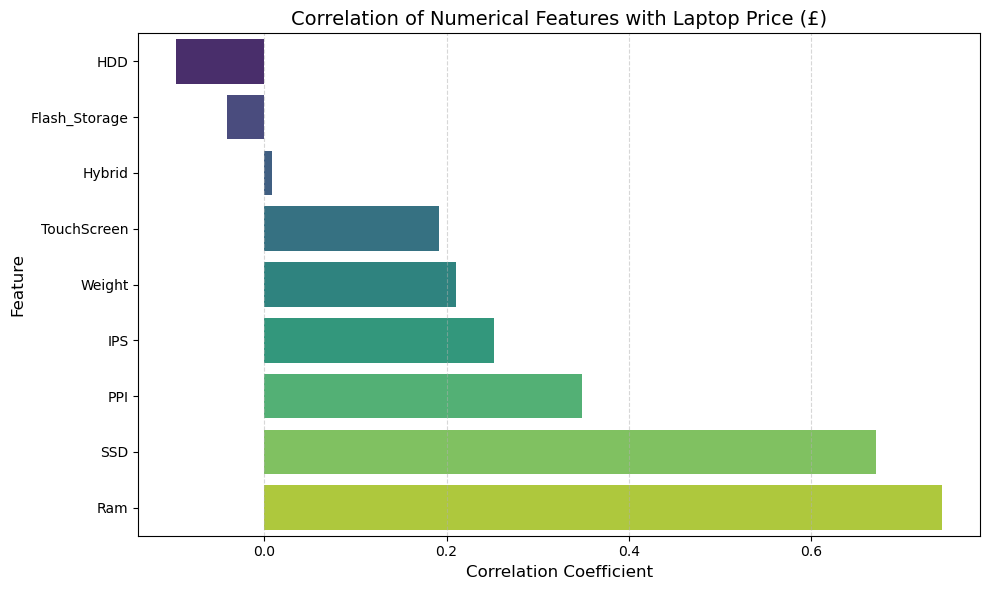

In [69]:
# --------------------------------------------------------
# Compute and plot correlation of all numerical features with 'Price_GBP'
# --------------------------------------------------------

# Calculate correlation (excluding 'Price_GBP' itself)
correlation_with_price = df.corr(numeric_only=True)['Price_GBP'].drop('Price_GBP')
correlation_with_price = correlation_with_price.sort_values(ascending=True)

# Create a temporary DataFrame for plotting
correlation_df = pd.DataFrame({
    'Feature': correlation_with_price.index,
    'Correlation': correlation_with_price.values
})

# Plot using hue to safely apply palette in seaborn ≥ 0.14
plt.figure(figsize=(10, 6))
sns.barplot(
    data=correlation_df,
    x='Correlation',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)

plt.title('Correlation of Numerical Features with Laptop Price (£)', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Storage Type Correlation Insights**

Based on the correlation analysis, we observe that the `Hybrid` and `Flash_Storage` features exhibit **negligible correlation** with `Price_GBP`, indicating they contribute little to price prediction. As such, they can be safely removed from the dataset to reduce noise and dimensionality.

On the other hand, `HDD` and `SSD` show more meaningful correlations:
- `HDD` is **negatively correlated** with price, which makes sense — lower-priced laptops are more likely to rely on traditional hard drives.
- `SSD` shows a **positive correlation** with price, reflecting the fact that higher-end laptops typically include faster solid-state drives for better performance.

These insights support the decision to retain `HDD` and `SSD` as relevant features while dropping less impactful ones like `Hybrid` and `Flash_Storage`.

In [71]:
# --------------------------------------------------------
# Display the current list of columns in the DataFrame
# --------------------------------------------------------

df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price_GBP',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [72]:
# --------------------------------------------------------
# Drop storage types with negligible correlation to price
# Based on correlation analysis: 'Hybrid' and 'Flash_Storage'
# --------------------------------------------------------

df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

# Preview the cleaned DataFrame
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,646.33,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,433.69,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,277.41,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,870.15,0,1,226.983005,Intel Core i5,0,256


#### Analysis on GPU

In [74]:
# --------------------------------------------------------
# Explore the distribution of GPU configurations
# This helps identify GPU vendors and common types
# --------------------------------------------------------

gpu_counts = df['Gpu'].value_counts()
print(gpu_counts)

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64


**GPU Feature Simplification Strategy**

Given the limited size of our dataset, it's more effective to extract only the **GPU brand** rather than using the full GPU model name. 

The full GPU strings often contain granular model details (e.g., "Nvidia GeForce GTX 1050"), which may not generalize well and could introduce unnecessary sparsity or noise during modeling.

Instead, by focusing on the **GPU manufacturer** — typically `Nvidia`, `AMD`, or `Intel` — we retain meaningful information about graphics capability while simplifying the feature space for better interpretability and model stability.

In [76]:
# --------------------------------------------------------
# Preview how to extract GPU brand from a full GPU string
# We'll split the string and take the first token (e.g., 'Nvidia', 'Intel', 'AMD')
# --------------------------------------------------------

example_gpu = df['Gpu'].iloc[1]
gpu_brand = example_gpu.split()[0]

print(f"Full GPU string: {example_gpu}")
print(f"Extracted GPU brand: {gpu_brand}")

Full GPU string: Intel HD Graphics 6000
Extracted GPU brand: Intel


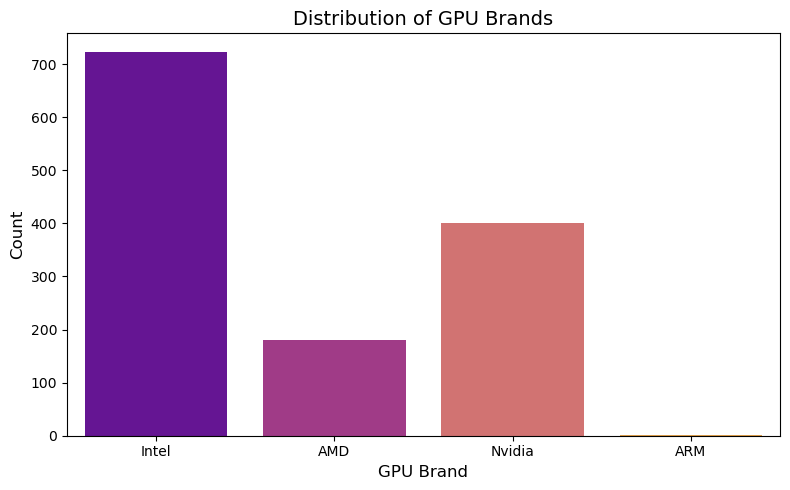

In [77]:
# --------------------------------------------------------
# Extract the GPU brand (first word) and visualize its distribution
# --------------------------------------------------------

# Create a new column for GPU brand (e.g., Nvidia, AMD, Intel)
df['Gpu brand'] = df['Gpu'].apply(lambda x: x.split()[0])

# Plot the count of laptops by GPU brand
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Gpu brand',
    data=df,
    hue='Gpu brand',          # Required for palette usage in Seaborn ≥ 0.14
    palette='plasma',
    legend=False              # Avoids redundant legend
)

plt.title('Distribution of GPU Brands', fontsize=14)
plt.xlabel('GPU Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

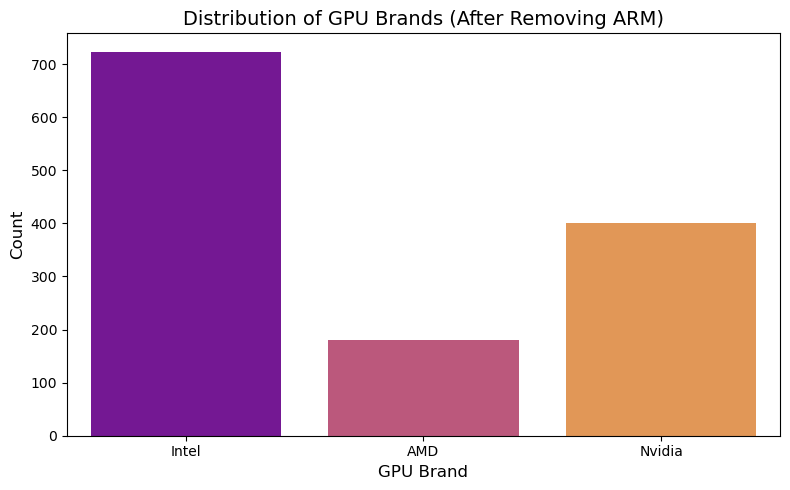

In [78]:
# --------------------------------------------------------
# Remove rare GPU brand 'ARM' from the dataset
# --------------------------------------------------------

df = df[df['Gpu brand'] != 'ARM']

# Re-visualize GPU brand distribution after removal
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Gpu brand',
    data=df,
    hue='Gpu brand',        
    palette='plasma',
    legend=False
)

plt.title('Distribution of GPU Brands (After Removing ARM)', fontsize=14)
plt.xlabel('GPU Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

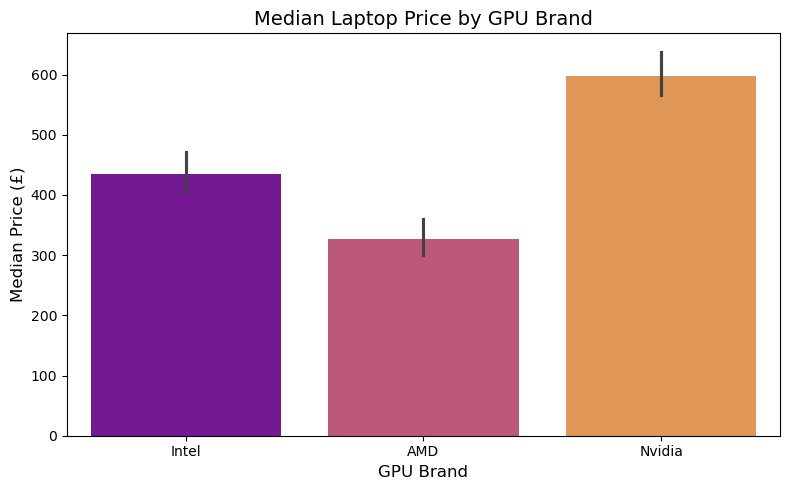

In [79]:
# --------------------------------------------------------
# Analyze median laptop price by GPU brand
# Using median helps reduce the impact of price outliers
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Gpu brand',
    y='Price_GBP',                  # Using the converted price column
    data=df,
    hue='Gpu brand',                # Required for color mapping in Seaborn ≥ 0.14
    estimator=np.median,
    palette='plasma',
    legend=False
)

plt.title('Median Laptop Price by GPU Brand', fontsize=14)
plt.xlabel('GPU Brand', fontsize=12)
plt.ylabel('Median Price (£)', fontsize=12)
plt.tight_layout()
plt.show()

In [80]:
# --------------------------------------------------------
# Drop the original 'Gpu' column after extracting 'Gpu brand'
# --------------------------------------------------------


df = df.drop(columns=['Gpu'])

# Preview the cleaned dataset
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,646.33,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,433.69,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,277.41,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,1224.19,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,870.15,0,1,226.983005,Intel Core i5,0,256,Intel


#### Operating System analysis

In [82]:
# --------------------------------------------------------
# Explore the distribution of Operating Systems in the dataset
# This helps guide how to group or encode OS categories
# --------------------------------------------------------

opsys_counts = df['OpSys'].value_counts()
print(opsys_counts)

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


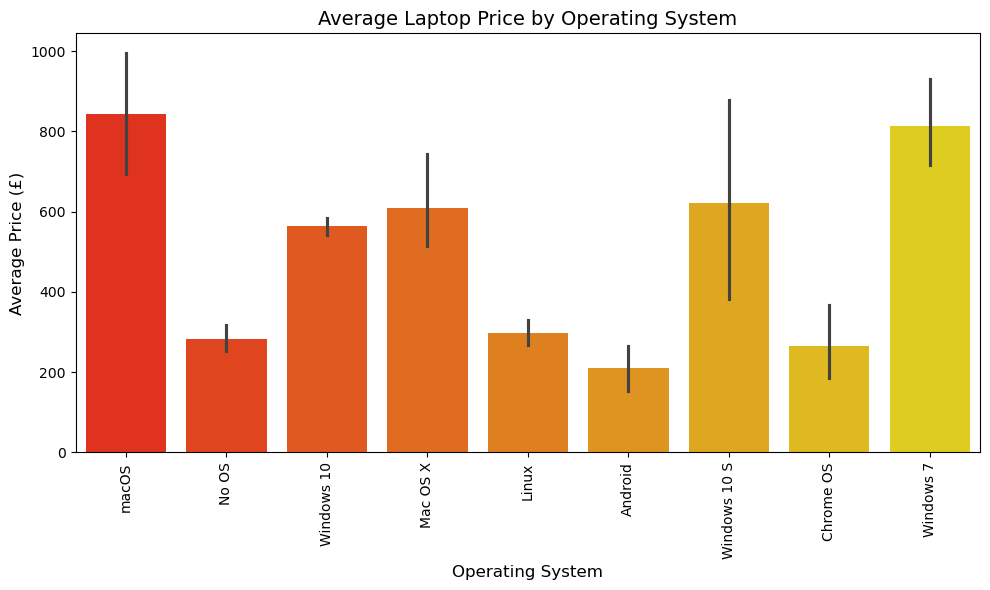

In [83]:
# --------------------------------------------------------
# Visualize average laptop price by operating system
# --------------------------------------------------------

plt.figure(figsize=(10, 6))
sns.barplot(
    x='OpSys',
    y='Price_GBP',
    data=df,
    hue='OpSys',    
    palette='autumn',
    estimator=np.mean,
    legend=False
)

plt.title('Average Laptop Price by Operating System', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [84]:
# --------------------------------------------------------
# View all unique operating system entries in the dataset
# --------------------------------------------------------

unique_os = df['OpSys'].unique()
print(unique_os)

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [85]:
# --------------------------------------------------------
# Group operating system entries into simplified categories
# - Windows variants → 'Windows'
# - macOS variants → 'Mac'
# - All others → 'Other'
# --------------------------------------------------------

def categorize_os(os_string):
    """
    Maps detailed OS names into general categories: Windows, Mac, Other.
    
    Parameters:
        os_string (str): The original OS label from the dataset.
    
    Returns:
        str: Simplified OS category.
    """
    if os_string in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        return 'Windows'
    elif os_string in ['Mac OS X', 'macOS']:
        return 'Mac'
    else:
        return 'Other'

# Apply the categorization function to the OpSys column
df['OpSys'] = df['OpSys'].apply(categorize_os)

# Preview the updated DataFrame
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,646.33,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,433.69,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,277.41,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,1224.19,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,870.15,0,1,226.983005,Intel Core i5,0,256,Intel


In [86]:
# --------------------------------------------------------
# Display a random sample of 5 rows from the dataset
# Useful for quick validation of recent transformations
# --------------------------------------------------------

df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
803,Dell,Notebook,8,Windows,2.06,843.81,1,0,138.461776,Intel Core i5,0,256,Nvidia
869,Dell,Workstation,8,Windows,2.23,857.80,0,0,141.211998,Intel Core i7,1000,0,Nvidia
77,Dell,Notebook,8,Windows,2.02,412.50,0,0,141.211998,Intel Core i7,1000,128,Intel
728,Dell,Notebook,8,Other,2.32,284.41,0,0,100.454670,Intel Core i5,1000,0,AMD
269,Lenovo,Notebook,8,Windows,2.05,424.56,0,0,141.211998,Intel Core i7,0,256,Intel


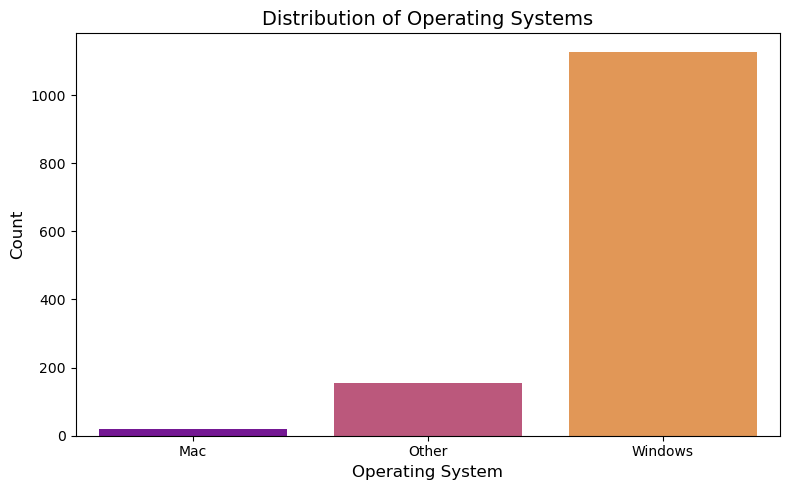

In [87]:
# --------------------------------------------------------
# Visualize the count of laptops by operating system category
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.countplot(
    x='OpSys',
    data=df,
    hue='OpSys',      
    palette='plasma',
    legend=False
)

plt.title('Distribution of Operating Systems', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

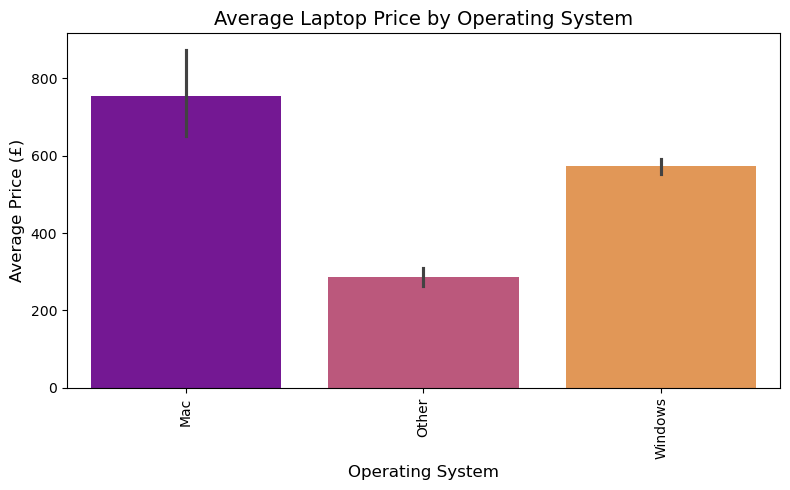

In [88]:
# --------------------------------------------------------
# Analyze average laptop price by operating system
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.barplot(
    x='OpSys',
    y='Price_GBP',
    data=df,
    hue='OpSys',              # Required for color mapping in Seaborn ≥ 0.14
    estimator=np.mean,
    palette='plasma',
    legend=False
)

plt.title('Average Laptop Price by Operating System', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

#### Weight analysis 

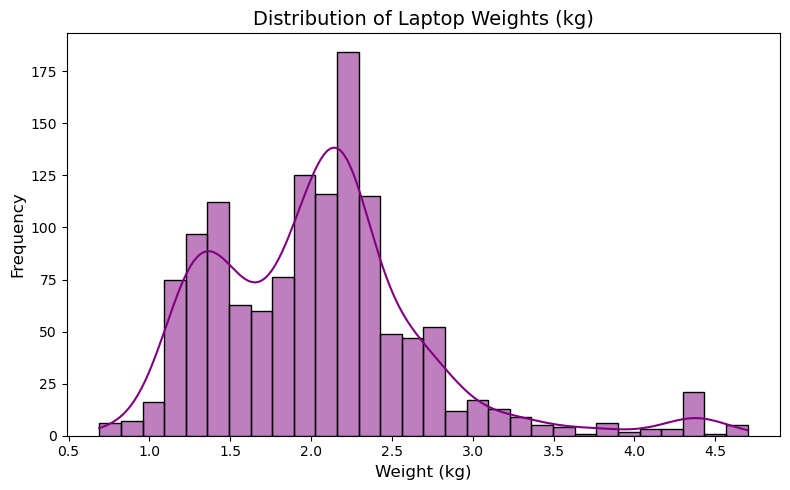

In [90]:
# --------------------------------------------------------
# Plot the distribution of laptop weights using modern Seaborn API
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], kde=True, color='purple', bins=30)

plt.title('Distribution of Laptop Weights (kg)', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

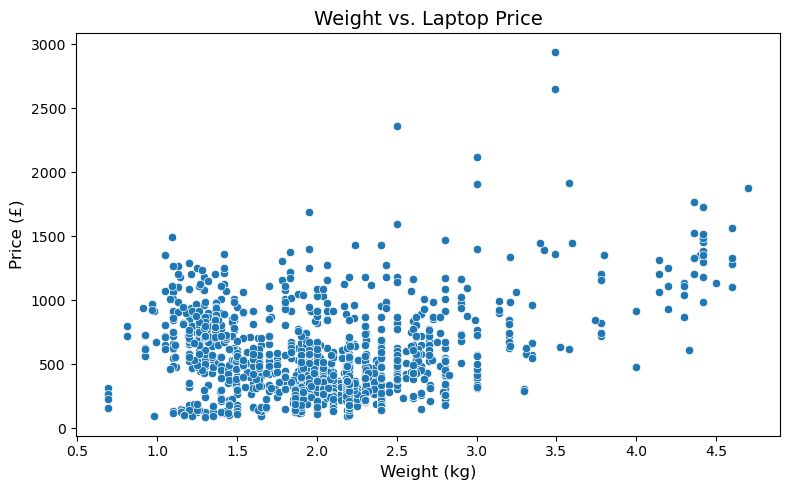

In [91]:
# --------------------------------------------------------
# Scatter plot to explore the relationship between weight and price
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Weight', y='Price_GBP', data=df)

plt.title('Weight vs. Laptop Price', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.tight_layout()
plt.show()

#### Price Analysis

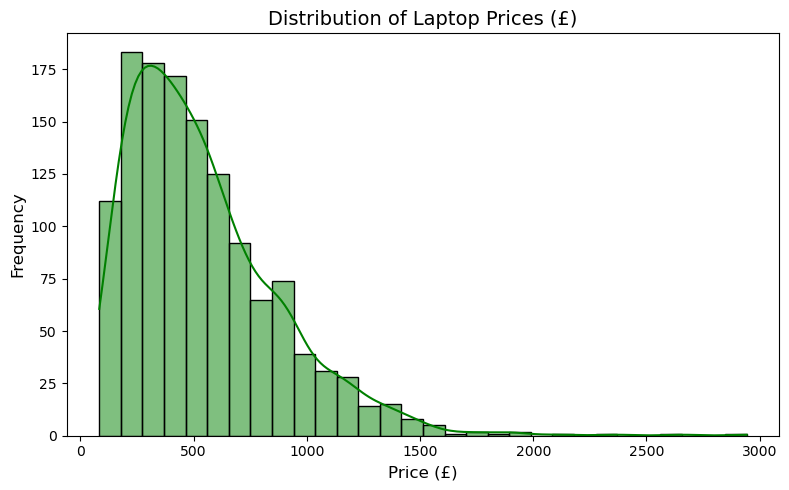

In [93]:
# --------------------------------------------------------
# Visualize the distribution of laptop prices in GBP
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.histplot(df['Price_GBP'], kde=True, color='green', bins=30)

plt.title('Distribution of Laptop Prices (£)', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

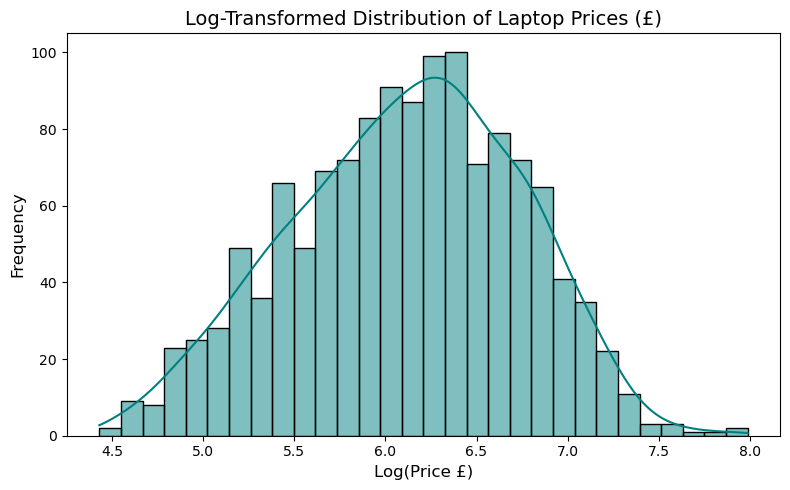

In [94]:
# --------------------------------------------------------
# Apply log transformation to laptop prices and plot the distribution
# This transformation helps normalize right-skewed data
# --------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.histplot(np.log(df['Price_GBP']), kde=True, color='teal', bins=30)

plt.title('Log-Transformed Distribution of Laptop Prices (£)', fontsize=14)
plt.xlabel('Log(Price £)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [95]:
# --------------------------------------------------------
# View correlations of all numerical features with laptop price (in GBP)
# --------------------------------------------------------

df.corr(numeric_only=True)['Price_GBP'].sort_values(ascending=False)

Price_GBP      1.000000
Ram            0.742905
SSD            0.670660
PPI            0.350885
IPS            0.253319
Weight         0.209867
TouchScreen    0.192917
HDD           -0.096891
Name: Price_GBP, dtype: float64

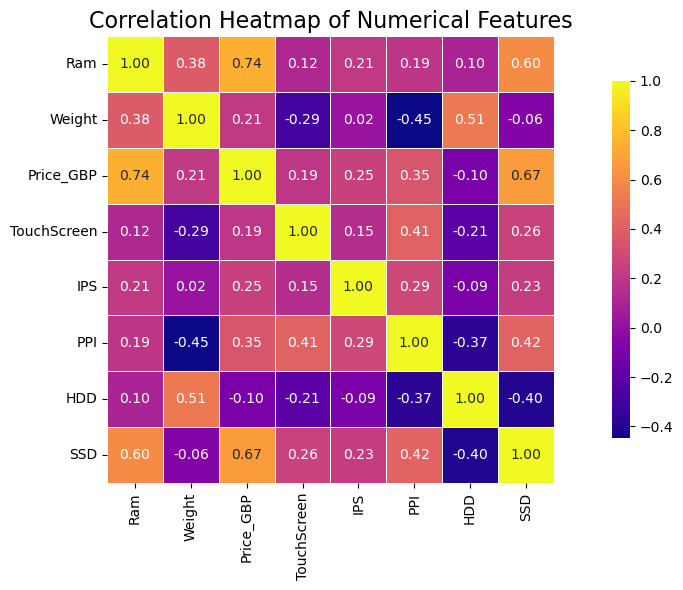

In [96]:
# --------------------------------------------------------
# Plot the correlation matrix of all numerical features
# --------------------------------------------------------

plt.figure(figsize=(12, 6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",                # Format correlation values to 2 decimal places
    cmap='plasma',
    square=True,
    linewidths=0.5,           # Adds subtle gridlines between cells
    cbar_kws={"shrink": 0.8}  # Shrink colorbar for aesthetics
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Model Building

In [98]:
# --------------------------------------------------------
# Prepare features (X) and target (y) for modeling
# Log-transform the target variable to normalize price distribution
# --------------------------------------------------------

# Log-transform the price in GBP
target = np.log(df['Price_GBP'])

# Drop the original price column to retain only features
features = df.drop(columns=['Price_GBP'])

### Importing Relevant Model Building Libraries

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer


In [101]:
# --------------------------------------------------------
# Split the data into training and testing sets
# 85% training, 15% testing for evaluation
# --------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    features,      # independent variables
    target,        # log-transformed price
    test_size=0.15,
    random_state=2
)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape

((1106, 12), (196, 12))

**Identifying Categorical Columns for ColumnTransformer**

To effectively preprocess our dataset using `Pipeline` and `ColumnTransformer`, we need to distinguish between **categorical** and **numerical** features. This allows us to apply the appropriate transformations (e.g., scaling for numerical columns, encoding for categorical ones).

Since `ColumnTransformer` expects either **column names** or **index positions**, we must identify the categorical features by their column indices (or names) within our `X_train` DataFrame.

This setup ensures that the correct transformers are applied to the right columns within the pipeline, leading to clean, efficient, and reproducible model training.

In [103]:
# --------------------------------------------------------
# Create a mapping of column index to column name
# Useful when referencing columns by index in ColumnTransformer
# --------------------------------------------------------

column_index_mapper = {i: col for i, col in enumerate(X_train.columns)}

# Display the mapping dictionary
column_index_mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

In [104]:
# --------------------------------------------------------
# Identify categorical columns in the training set
# This step is necessary for encoding during preprocessing
# --------------------------------------------------------

categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]
# Display the list of categorical column names (if needed)
print("Categorical features identified:", categorical_cols)
print("Numerical features identified:", numerical_cols)

Categorical features identified: ['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']
Numerical features identified: ['Ram', 'Weight', 'TouchScreen', 'IPS', 'PPI', 'HDD', 'SSD']


In [105]:
# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave all other columns unchanged
)

### Linear Regression

In [108]:
# --------------------------------------------------------
# Define preprocessing and modeling pipeline
# OneHotEncode selected categorical columns, passthrough the rest
# --------------------------------------------------------


# Linear Regression model
model = LinearRegression()

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# --------------------------------------------------------
# Evaluate model performance
# --------------------------------------------------------

print('R² Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

R² Score: 0.7862066616351409
Mean Absolute Error (MAE): 0.21633009497808295


**Interpreting MAE After Log Transformation**

Since we applied a log transformation to the target variable (`Price_GBP`), the MAE reported is in **log scale**. To interpret this in the original price scale (GBP), we can exponentiate the MAE:

```python

In [110]:
np.exp(0.21)

1.2336780599567432

### Ridge Regression

In [112]:
# --------------------------------------------------------
# Ridge Regression with One-Hot Encoding for categorical columns
# Applies regularization to improve generalization
# --------------------------------------------------------

# Ridge Regression with regularization strength alpha=10
model = Ridge(alpha=10)

# Combine into a pipeline
ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', model)
])

# Fit the model
ridge_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_pipeline.predict(X_test)

# --------------------------------------------------------
# Evaluate model performance
# --------------------------------------------------------

print('R² Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

R² Score: 0.7959228530571277
Mean Absolute Error (MAE): 0.21331976771323324


### LassoRegression

In [114]:
# --------------------------------------------------------
# Lasso Regression with One-Hot Encoding for selected categorical columns
# Lasso applies L1 regularization — useful for feature selection
# --------------------------------------------------------

# Lasso Regression model with L1 regularization
model = Lasso(alpha=0.001)

# Complete pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# --------------------------------------------------------
# Evaluate model performance
# --------------------------------------------------------

print('R² Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

R² Score: 0.7884174305093636
Mean Absolute Error (MAE): 0.21640673361062648


### Decision Tree

In [116]:
# --------------------------------------------------------
# Decision Tree Regression with One-Hot Encoding for categorical features
# max_depth=8 limits tree complexity to prevent overfitting
# --------------------------------------------------------

# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=8)

# Combine into pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# --------------------------------------------------------
# Evaluate model performance
# --------------------------------------------------------

print('R² Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

R² Score: 0.8499851468989134
Mean Absolute Error (MAE): 0.17890653577685828


### Random Forest

In [118]:
# --------------------------------------------------------
# Random Forest Regression with One-Hot Encoding for categorical features
# Custom forest parameters to control model complexity and improve generalization
# --------------------------------------------------------


# Random Forest Regressor with controlled hyperparameters
model = RandomForestRegressor(
    n_estimators=100,        # Number of trees
    random_state=3,          # For reproducibility
    max_samples=0.5,         # Use 50% of training data for each tree (bagging)
    max_features=0.75,       # Use 75% of features in each split (feature bagging)
    max_depth=15             # Restrict tree depth to avoid overfitting
)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# --------------------------------------------------------
# Evaluate model performance
# --------------------------------------------------------

print('R² Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

R² Score: 0.8878278581009282
Mean Absolute Error (MAE): 0.16124517085717754


## 🔁 Cross-Validation with Alternative Model Predictions

To evaluate model robustness and generalization, we compare the predictions of various regression models side-by-side. This cross-analysis includes:

- 📊 **Manually Tuned Random Forest**
- 📈 **Bayesian Optimized Random Forest**
- 🔀 **Ensemble Average**
- 🧠 **Stacked Regressor**

These comparisons help us validate consistency across models and ensure the final selected model achieves both high predictive performance and stability across the dataset.

In [120]:
# --------------------------------------------------------
# Identify categorical columns in the training set
# This step is necessary for encoding during preprocessing
# --------------------------------------------------------

# Display the list of categorical column names (if needed)
print("Categorical features identified:", categorical_cols)

Categorical features identified: ['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']


#### 📊 Manually Tuned Random Forest

In [122]:
# Pipeline with preprocessing and manually tuned Random Forest Regressor
manual_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,        # Number of trees
        max_depth=15,            # Limit tree depth for generalization
        max_features=0.75,       # Fraction of features used at each split
        max_samples=0.5,         # Fraction of samples used per tree
        random_state=3           # Ensure reproducibility
    ))
])

# Train the model on training data
manual_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_manual = manual_pipeline.predict(X_test)

# Evaluate and display model performance
print("Manual R²:", metrics.r2_score(y_test, y_pred_manual))

Manual R²: 0.8878278581009282


In [123]:
# Refined hyperparameter grid for Random Forest tuning
params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],         # Number of trees in the forest
            'max_depth': [12, 15, 18],               # Maximum depth of each tree
            'max_features': [0.7, 0.75, 0.8],        # Fraction of features to consider at each split
            'max_samples': [0.4, 0.5, 0.6],          # Fraction of training samples used per tree
            'min_samples_split': [2, 5],             # Minimum samples required to split a node
            'min_samples_leaf': [1, 2],              # Minimum samples required at a leaf node
            'bootstrap': [True],                     # Enables sampling with replacement (required for max_samples)
            'criterion': ['squared_error'],          # Loss function for regression
            'ccp_alpha': [0.0, 0.0025, 0.005]         # Complexity parameter for pruning
        }
    }
}

#### 📈Bayesian Optimized Random Forest

In [125]:
# Pipeline for encoding + model tuning
pipeline = Pipeline([
    ('preprocessing', preprocessor),  # includes OneHotEncoder for categorical features
    ('regressor', RandomForestRegressor(bootstrap=True, criterion='squared_error', random_state=42))
])

# Bayesian search space for hyperparameter optimization
search_space = {
    'regressor__n_estimators': Integer(100, 300),
    'regressor__max_depth': Integer(12, 18),
    'regressor__max_features': Real(0.7, 0.8),
    'regressor__max_samples': Real(0.4, 0.6),
    'regressor__min_samples_split': Integer(2, 5),
    'regressor__min_samples_leaf': Integer(1, 2),
    'regressor__ccp_alpha': Real(0.0, 0.005),
}

# Bayesian hyperparameter optimization with cross-validation
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space,
    n_iter=32,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to training data
opt.fit(X_train, y_train)

# Report best cross-validated R²
print("Bayes Opt Best R² (CV):", round(opt.best_score_, 4))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [126]:
# Extract the best model from the Bayesian optimization search
best_model = opt.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate performance on the test data
print("Final R² on Test Set:", round(metrics.r2_score(y_test, y_pred_best), 4))

Final R² on Test Set: 0.881


#### 🔀 Ensemble Average

In [128]:
# Create the ensemble using fully-wrapped models
ensemble = VotingRegressor([
    ('manual', manual_pipeline),
    ('bayes_opt', best_model)
])

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict and evaluate
y_ens_pred = ensemble.predict(X_test)
print("Ensemble R²:", round(metrics.r2_score(y_test, y_ens_pred), 4))


Ensemble R²: 0.8852


In [129]:
# Initialize leaderboard storage 
models = {
    'Manual_RF': y_pred_manual,
    'Bayes_Opt_RF': y_pred_best,
    'Ensemble': y_ens_pred,
}

#### 🧠 Stacked Regressor

In [131]:
# Define base models (raw, no preprocessing inside)
model_rf = RandomForestRegressor(n_estimators=100,        # Number of trees
        max_depth=15,            # Limit tree depth for generalization
        max_features=0.75,       # Fraction of features used at each split
        max_samples=0.5,         # Fraction of samples used per tree
        random_state=3           # Ensure reproducibility) 
                                )
model_ridge = Ridge()
model_xgb = XGBRegressor(  n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42)

# Create stacking regressor (just base models)
stacked_model = StackingRegressor(
    estimators=[
        ('rf', model_rf),
        ('ridge', model_ridge),
        ('xgb', model_xgb),
    ],
    final_estimator=Ridge(),
    n_jobs=-1
)

# Final full pipeline: shared preprocessing + stacked model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', stacked_model)
])

# Fit the full pipeline on raw data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Ram', 'Weight',
                                                   'TouchScreen', 'IPS', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_name',
                                                   'Gpu brand'])])),
                ('model',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(max_depth=15,
                                                                      max...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))],
                                   final_estimator=Ridge(), n_jobs=-1))])

In [132]:
# Predict with the stacked model
y_stack = pipeline.predict(X_test)

In [133]:
models['stacked'] = y_stack

In [134]:
# Display R² and MAE scores for all evaluated models
for name, prediction in models.items():
    r2 = round(r2_score(y_test, prediction), 4)
    mae = round(mean_absolute_error(y_test, prediction), 4)
    print(f"\n{name}")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error: {mae}")


Manual_RF
R² Score: 0.8878
Mean Absolute Error: 0.1612

Bayes_Opt_RF
R² Score: 0.881
Mean Absolute Error: 0.1631

Ensemble
R² Score: 0.8852
Mean Absolute Error: 0.1615

stacked
R² Score: 0.8934
Mean Absolute Error: 0.1496


### Saving Model

In [136]:
# Save the final stacked model using joblib
import joblib

# Save preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

# Save the stacked model
joblib.dump(stacked_model, 'final_stacked_model.joblib')

#Save stacked pipeline 
joblib.dump(pipeline, 'pipeline.joblib')

# Save model dictionary containing performance metrics of all models 
joblib.dump(models, 'models_performance_metrics.joblib')

# Confirm the model has been saved
print('Stacked model saved as final_stacked_model.joblib')

Stacked model saved as final_stacked_model.joblib


### Saving Important Information 

##### Save Leaderboard Results
Store the leaderboard results in a file for easy access and comparison of model performance across different models.

In [139]:
# Create a DataFrame to store leaderboard results
leaderboard = pd.DataFrame({
    'Model': ['Manual_RF', 'Bayes_Opt_RF', 'Ensemble', 'Stacked'],
    'R² Score': [0.8878, 0.881, 0.8852, 0.8934],
    'MAE': [0.1612, 0.1631, 0.1615, 0.1496]
})

# Save leaderboard results to a CSV file
leaderboard.to_csv('leaderboard_results.csv', index=False)

# Confirm the results have been saved
print('Leaderboard results saved')

Leaderboard results saved


##### Feature Importance Comparison
Visualize and save feature importance from different models, such as the manual Random Forest, the Bayes Optimized model, and XGBoost, to understand which features are most influential in predicting the target variable.

<Figure size 1200x800 with 0 Axes>

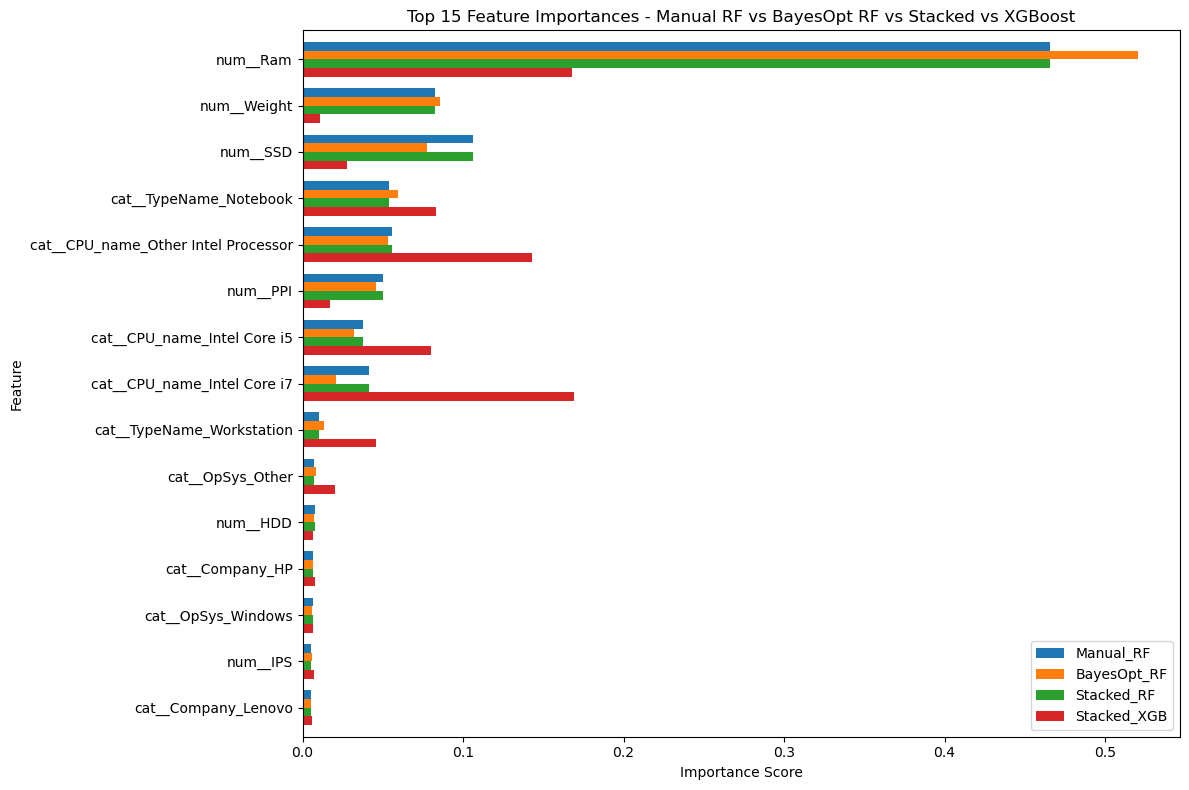

In [178]:
# Extract feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances
rf_manual_imp = manual_pipeline.named_steps['regressor'].feature_importances_
rf_bayes_imp = best_model.named_steps['regressor'].feature_importances_
# For the stacked model, we extract the feature importances from the base models
# Access base models directly from the stacking model's estimators_
rf_stacked = stacked_model.estimators_[0].feature_importances_  # From Random Forest
xgb_stacked = stacked_model.estimators_[2].feature_importances_  # From XGBoost

# Combine into a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Manual_RF': rf_manual_imp,
    'BayesOpt_RF': rf_bayes_imp,
    'Stacked_RF': rf_stacked,  # RF from stacked model
    'Stacked_XGB': xgb_stacked  # XGB from stacked model
}).sort_values(by='BayesOpt_RF', ascending=False)

# Save to CSV
feat_importance_df.to_csv('feature_importances_comparison.csv', index=False)
# Save the feature importances to a joblib file
joblib.dump(feat_importance_df, 'feature_importances.joblib')

top_n = 15  # Show top 15 important features
plot_df = feat_importance_df.head(top_n).set_index('Feature')

plt.figure(figsize=(12, 8))
plot_df.plot(kind='barh', figsize=(12, 8), width=0.75)
plt.title("Top 15 Feature Importances - Manual RF vs BayesOpt RF vs Stacked vs XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300)
plt.show()

##### Saving Version of dependencies 

In [176]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Prediction on the Entire Dataset

In [182]:
# Initialize an empty list to store predictions
predicted = []

# Predict using the stacked model on the entire dataset at once
predicted = pipeline.predict(features)

# The predicted list now contains predictions for each row in train
predicted

array([6.53630948, 6.15835325, 5.693305  , ..., 4.75070639, 5.8642487 ,
       5.14961973])

In [184]:
# Retransform the predicted values from log scale to original price scale
ans = [np.exp(pred) for pred in predicted]

# Round the predicted prices to 2 decimal places
ans = np.round(ans, 2)

In [186]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price_GBP,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,646.33,0,1,226.983005,Intel Core i5,0,128,Intel,689.74
1,Apple,Ultrabook,8,Mac,1.34,433.69,0,0,127.677940,Intel Core i5,0,0,Intel,472.65
2,HP,Notebook,8,Other,1.86,277.41,0,0,141.211998,Intel Core i5,0,256,Intel,296.87
3,Apple,Ultrabook,16,Mac,1.83,1224.19,0,1,220.534624,Intel Core i7,0,512,AMD,1289.31
4,Apple,Ultrabook,8,Mac,1.37,870.15,0,1,226.983005,Intel Core i5,0,256,Intel,784.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,307.80,1,1,157.350512,Intel Core i7,0,128,Intel,336.70
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,723.19,1,1,276.053530,Intel Core i7,0,512,Intel,794.78
1300,Lenovo,Notebook,2,Windows,1.50,110.48,0,0,111.935204,Other Intel Processor,0,0,Intel,115.67
1301,HP,Notebook,6,Windows,2.19,368.59,0,0,100.454670,Intel Core i7,1000,0,AMD,352.22


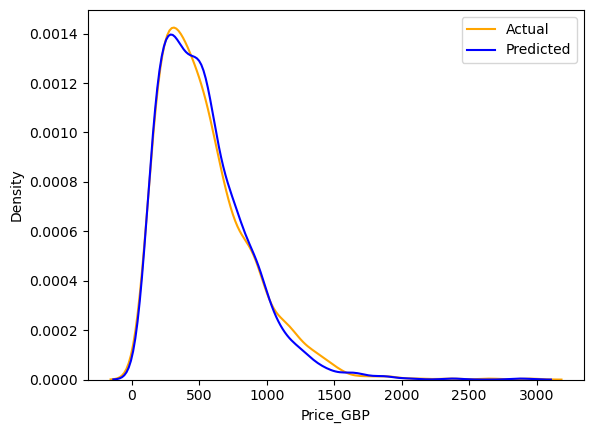

In [188]:
# Plot the distribution of actual and predicted prices
sns.kdeplot(df['Price_GBP'], color='orange', label='Actual')
sns.kdeplot(df['Predicted Price'], color='blue', label='Predicted')

# Add legend and show plot
plt.legend()
plt.show()